# ***ANÁLISIS DE INFLUENCIAS EN EL GASTO RESPECTO AL CAMBIO CLIMÁTICO: 2014 - 2023***



In [ ]:
from google.colab import drive
drive.mount('/content/drive')qa

Mounted at /content/drive


In [ ]:
pip install geopandas

In [ ]:
!pip install geopandas matplotlib

In [ ]:
import geopandas as gpd
import pandas as pd
from pathlib import Path
import glob
import matplotlib.pyplot as plt
import os
import numpy as np
import seaborn as sns  # Para mejorar la estética del gráfico
import plotly.express as px # Esta la libreria nos permite que las barras sean mas dinamicas

# ***Union de todos los Dataset en uno solo***


In [ ]:
# Esta es la ruta que contiene los archivos CSV (los dataset de los gastos climativos en formato csv)
folder_path = '/content/drive/My Drive/BIG_DATA/DataSet_Clima/'

In [ ]:
# Una lista para almacenar los DataFrames de cada archivo CSV
dfs = []

In [ ]:
# Nombres de los archivos CSV y lo mostramos
file_names = ['Gasto2014.csv', 'Gasto2015.csv', 'Gasto2016.csv', 'Gasto2017.csv', 'Gasto2018.csv', 'Gasto2019.csv', 'Gasto2020.csv', 'Gasto2021.csv', 'Gasto2022.csv', 'Gasto2023.csv']
file_names


['Gasto2014.csv',
 'Gasto2015.csv',
 'Gasto2016.csv',
 'Gasto2017.csv',
 'Gasto2018.csv',
 'Gasto2019.csv',
 'Gasto2020.csv',
 'Gasto2021.csv',
 'Gasto2022.csv',
 'Gasto2023.csv']

In [ ]:
# Leemos cada archivo CSV y agregarlo a la lista
for file_name in file_names:
    file_path = folder_path + file_name
    df = pd.read_csv(file_path)
    dfs.append(df)

In [ ]:
# Concatenamos los DataFrames en uno solo
Gasto_Acum = pd.concat(dfs, ignore_index=True)

In [ ]:
#Guardamos el DataFrame que contiene todo en un nuevo archivo CSV
Gasto_Acum.to_csv('/content/drive/My Drive/BIG_DATA/Gasto_Acum.csv', index=False)


In [ ]:
# Imprimimos las 10 primeras filas del DataFrame combinado
print(Gasto_Acum.head(10))

   ANO_EJE  MES_EJE NIVEL_GOBIERNO NIVEL_GOBIERNO_NOMBRE SECTOR  \
0     2014        0              R  GOBIERNOS REGIONALES     99   
1     2014        0              R  GOBIERNOS REGIONALES     99   
2     2014        0              R  GOBIERNOS REGIONALES     99   
3     2014        0              M     GOBIERNOS LOCALES          
4     2014        0              M     GOBIERNOS LOCALES          
5     2014        0              M     GOBIERNOS LOCALES          
6     2014        0              M     GOBIERNOS LOCALES          
7     2014        5              R  GOBIERNOS REGIONALES     99   
8     2014        9              R  GOBIERNOS REGIONALES     99   
9     2014        8              R  GOBIERNOS REGIONALES     99   

          SECTOR_NOMBRE PLIEGO                  PLIEGO_NOMBRE  SEC_EJEC  \
0  GOBIERNOS REGIONALES    451  GOBIERNO REGIONAL LA LIBERTAD       848   
1  GOBIERNOS REGIONALES    453       GOBIERNO REGIONAL LORETO      1407   
2  GOBIERNOS REGIONALES    441       

In [ ]:
# Imprimimos las ultimas 10 filas del DataFrame combinado
print(Gasto_Acum.tail(10))

         ANO_EJE  MES_EJE NIVEL_GOBIERNO NIVEL_GOBIERNO_NOMBRE SECTOR  \
3007186     2023        2              E     GOBIERNO NACIONAL     05   
3007187     2023        7              R  GOBIERNOS REGIONALES     99   
3007188     2023        8              E     GOBIERNO NACIONAL     38   
3007189     2023       12              M     GOBIERNOS LOCALES          
3007190     2023       10              R  GOBIERNOS REGIONALES     99   
3007191     2023        2              E     GOBIERNO NACIONAL     05   
3007192     2023       11              E     GOBIERNO NACIONAL     05   
3007193     2023        7              E     GOBIERNO NACIONAL     05   
3007194     2023        4              E     GOBIERNO NACIONAL     13   
3007195     2023       11              R  GOBIERNOS REGIONALES     99   

                SECTOR_NOMBRE PLIEGO  \
3007186             AMBIENTAL    050   
3007187  GOBIERNOS REGIONALES    444   
3007188            PRODUCCION    240   
3007189                             

# ***Importacion de los Geodataset(en este caso importamos todos para tener referencia, pero solo se uso el Geopandas de "departamental")***

In [ ]:
# Esta es la ruta que contiene los geojson
geojson_folder_path = '/content/drive/My Drive/BIG_DATA/GeoPandasPeru/'

In [ ]:
# La ruta de los archivos shapefile de tus Geodatasets
path_capital_provincia = '/content/drive/My Drive/BIG_DATA/GeoPandasPeru/capital_provincia.geojson'
path_departamental = '/content/drive/My Drive/BIG_DATA/GeoPandasPeru/departamental.geojson'
path_distrital = '/content/drive/My Drive/BIG_DATA/GeoPandasPeru/distrital.geojson'
path_provincial = '/content/drive/My Drive/BIG_DATA/GeoPandasPeru/provincial.geojson'

In [ ]:
# Cargamos el GeoDataFrame(departamental) desde el archivo
gdf = gpd.read_file(path_departamental)

# Mostramos los nombres que tiene cada columnas
print(gdf.columns)

Index(['NOMBDEP', 'COUNT', 'FIRST_IDDP', 'HECTARES', 'geometry'], dtype='object')


In [ ]:
# Cargamos los Geodatasets
gdf_capital_provincia = gpd.read_file(path_capital_provincia)
gdf_departamental = gpd.read_file(path_departamental)
gdf_distrital = gpd.read_file(path_distrital)
gdf_provincial = gpd.read_file(path_provincial)

# ***Primero vamos a buscar la informacion de gastos anuales en 3 años para tener referencia: 2014 - 2017 - 2023***

***2014:
 Informacion***

In [ ]:
# Asegurémonos de que el mes tenga dos dígitos y filtre los meses '00'
Gasto_Acum['MES_EJE'] = Gasto_Acum['MES_EJE'].astype(str).str.zfill(2)
Gasto_Acum = Gasto_Acum[Gasto_Acum['MES_EJE'] != '00']

# Crear una columna de fecha combinando 'ANO_EJE' y 'MES_EJE'
Gasto_Acum['FECHA'] = pd.to_datetime(Gasto_Acum['ANO_EJE'].astype(str) + '-' + Gasto_Acum['MES_EJE'].astype(str), format='%Y-%m')

# Filtrar el DataFrame para el año 2014
gasto_2014 = Gasto_Acum[Gasto_Acum['FECHA'].dt.year == 2014]

# Agrupar por departamento y sumar los montos devengados
departamento_gasto = gasto_2014.groupby('DEPARTAMENTO_EJECUTORA_NOMBRE')['MONTO_DEVENGADO'].sum().reset_index()

# Establecer umbrales para la categorización
gasto_minimo = departamento_gasto['MONTO_DEVENGADO'].quantile(1/3)
gasto_regular = departamento_gasto['MONTO_DEVENGADO'].quantile(2/3)

# Crear una nueva columna 'Categoria' basada en los montos devengados
departamento_gasto['Categoria'] = pd.cut(departamento_gasto['MONTO_DEVENGADO'],
                                         bins=[-np.inf, gasto_minimo, gasto_regular, np.inf],
                                         labels=['Menos Gastos', 'Gastos Regulares', 'Más Gastos'],
                                         right=False)

# Mostrar las categorías y los nombres de los departamentos
print("Departamentos con Menos Gastos:")
print(departamento_gasto[departamento_gasto['Categoria'] == 'Menos Gastos']['DEPARTAMENTO_EJECUTORA_NOMBRE'].tolist())

print("\nDepartamentos con Gastos Regulares:")
print(departamento_gasto[departamento_gasto['Categoria'] == 'Gastos Regulares']['DEPARTAMENTO_EJECUTORA_NOMBRE'].tolist())

print("\nDepartamentos con Más Gastos:")
print(departamento_gasto[departamento_gasto['Categoria'] == 'Más Gastos']['DEPARTAMENTO_EJECUTORA_NOMBRE'].tolist())


Departamentos con Menos Gastos:
['AMAZONAS', 'JUNIN', 'LAMBAYEQUE', 'MOQUEGUA', 'PROVINCIA CONSTITUCIONAL DEL CALLAO', 'TACNA', 'TUMBES', 'UCAYALI']

Departamentos con Gastos Regulares:
['AREQUIPA', 'HUANCAVELICA', 'HUANUCO', 'ICA', 'LA LIBERTAD', 'MADRE DE DIOS', 'PASCO', 'PIURA']

Departamentos con Más Gastos:
['ANCASH', 'APURIMAC', 'AYACUCHO', 'CAJAMARCA', 'CUSCO', 'LIMA', 'LORETO', 'PUNO', 'SAN MARTIN']


***Grafico:***

<ipython-input-122-658ea62b977a>:44: UserWarning:

Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.




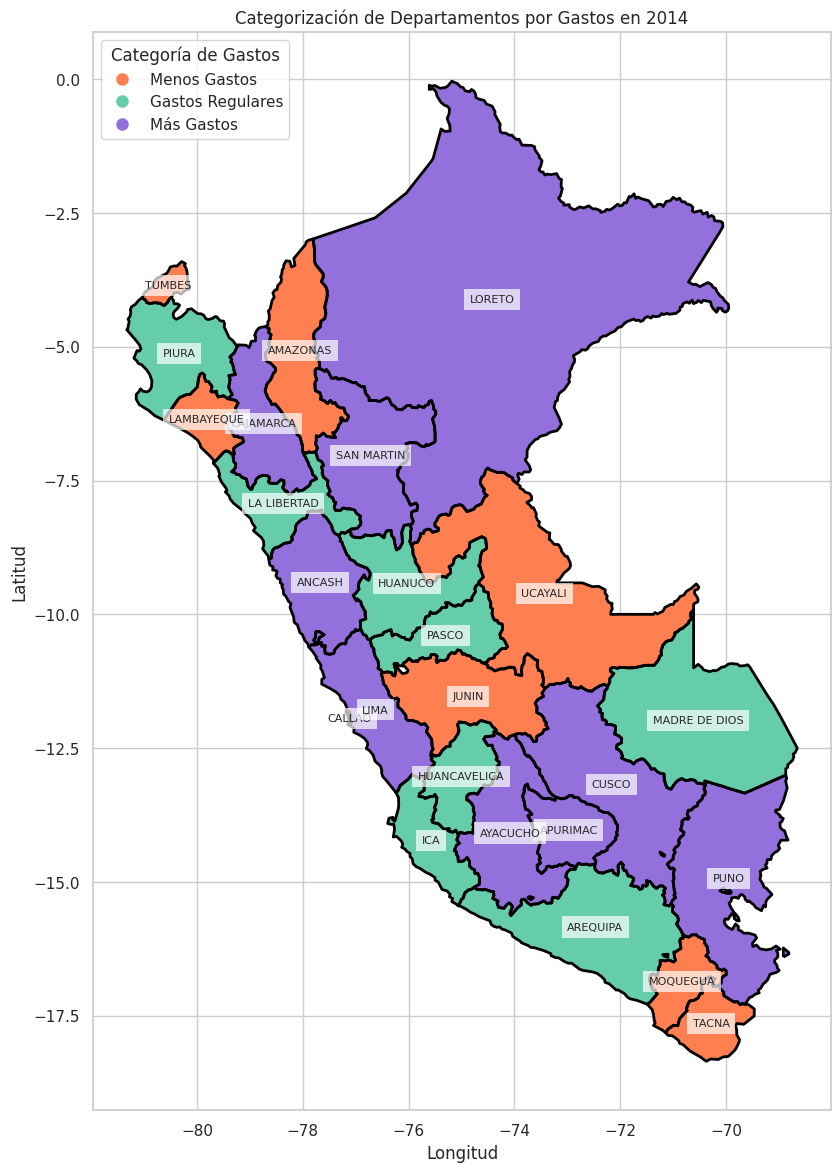

In [ ]:
# Asegurémonos de que el mes tenga dos dígitos y filtre los meses '00'
Gasto_Acum['MES_EJE'] = Gasto_Acum['MES_EJE'].astype(str).str.zfill(2)
Gasto_Acum = Gasto_Acum[Gasto_Acum['MES_EJE'] != '00']

# Creamos una columna de fecha combinando 'ANO_EJE' y 'MES_EJE'
Gasto_Acum['FECHA'] = pd.to_datetime(Gasto_Acum['ANO_EJE'].astype(str) + '-' + Gasto_Acum['MES_EJE'].astype(str), format='%Y-%m')

# Filtramos el DataFrame para el año 2014
gasto_2014 = Gasto_Acum[Gasto_Acum['FECHA'].dt.year == 2014]

# Agrupamos por departamento y sumamos los montos devengados
departamento_gasto = gasto_2014.groupby('DEPARTAMENTO_EJECUTORA_NOMBRE')['MONTO_DEVENGADO'].sum().reset_index()

# Establecemos los umbrales para la categorización
gasto_minimo = departamento_gasto['MONTO_DEVENGADO'].quantile(1/3)
gasto_regular = departamento_gasto['MONTO_DEVENGADO'].quantile(2/3)

# Creamos una nueva columna 'Categoria' basada en los montos devengados
departamento_gasto['Categoria'] = pd.cut(departamento_gasto['MONTO_DEVENGADO'],
                                         bins=[-np.inf, gasto_minimo, gasto_regular, np.inf],
                                         labels=['Menos Gastos', 'Gastos Regulares', 'Más Gastos'],
                                         right=False)

# Cargamos el Geodataset de departamental
path_departamental = '/content/drive/My Drive/BIG_DATA/GeoPandasPeru/departamental.geojson'
gdf_departamental = gpd.read_file(path_departamental)

# Fusionamos con el DataFrame Gasto_Acum
gdf_departamental = gdf_departamental.merge(departamento_gasto, left_on='NOMBDEP', right_on='DEPARTAMENTO_EJECUTORA_NOMBRE', how='left')

# Mapeamos los colores según la categoría (colores diferentes)
colors = {'Menos Gastos': '#FF7F50', 'Gastos Regulares': '#66CDAA', 'Más Gastos': '#9370DB'}

# Creamos una nueva figura y ejes con fondo blanco
fig, ax = plt.subplots(figsize=(18, 14))
ax.set_facecolor('white')

# Graficamos el mapa de Perú y colorear los departamentos según la categoría
gdf_departamental.boundary.plot(ax=ax, linewidth=2, edgecolor='black')  # Líneas de límites más gruesas
for categoria, color in colors.items():
    gdf_departamental[gdf_departamental['Categoria'] == categoria].plot(ax=ax, color=color, legend=True, label=categoria)

# Agregamos nombres de departamentos con fondo blanco para mejor visibilidad
for x, y, label in zip(gdf_departamental.geometry.centroid.x, gdf_departamental.geometry.centroid.y, gdf_departamental['NOMBDEP']):
    ax.text(x, y, label, fontsize=8, ha='center', va='center', bbox=dict(facecolor='white', alpha=0.7, edgecolor='none'))

# Agregamos una leyenda manualmente
legend_entries = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10, label=categoria) for categoria, color in colors.items()]
ax.legend(handles=legend_entries, title='Categoría de Gastos', loc='upper left')

# Añadimos título y etiquetas de ejes
plt.title('Categorización de Departamentos por Gastos en 2014')
plt.xlabel('Longitud')
plt.ylabel('Latitud')

# Mostramos el gráfico
plt.show()


***2017: Informacion***

In [ ]:
# Asegurémonos de que el mes tenga dos dígitos y filtre los meses '00'
Gasto_Acum['MES_EJE'] = Gasto_Acum['MES_EJE'].astype(str).str.zfill(2)
Gasto_Acum = Gasto_Acum[Gasto_Acum['MES_EJE'] != '00']

# Creamos una columna de fecha combinando 'ANO_EJE' y 'MES_EJE'
Gasto_Acum['FECHA'] = pd.to_datetime(Gasto_Acum['ANO_EJE'].astype(str) + '-' + Gasto_Acum['MES_EJE'].astype(str), format='%Y-%m')

# Filtramos el DataFrame para el año 2017
gasto_2017 = Gasto_Acum[Gasto_Acum['FECHA'].dt.year == 2017]

# Agrupamos por departamento y sumar los montos devengados
departamento_gasto = gasto_2017.groupby('DEPARTAMENTO_EJECUTORA_NOMBRE')['MONTO_DEVENGADO'].sum().reset_index()

# Establecemos umbrales para la categorización
gasto_minimo = departamento_gasto['MONTO_DEVENGADO'].quantile(1/3)
gasto_regular = departamento_gasto['MONTO_DEVENGADO'].quantile(2/3)

# Creamos una nueva columna 'Categoria' basada en los montos devengados
departamento_gasto['Categoria'] = pd.cut(departamento_gasto['MONTO_DEVENGADO'],
                                         bins=[-np.inf, gasto_minimo, gasto_regular, np.inf],
                                         labels=['Menos Gastos', 'Gastos Regulares', 'Más Gastos'],
                                         right=False)

# Mostramos las categorías y los nombres de los departamentos
print("Departamentos con Menos Gastos:")
print(departamento_gasto[departamento_gasto['Categoria'] == 'Menos Gastos']['DEPARTAMENTO_EJECUTORA_NOMBRE'].tolist())

print("\nDepartamentos con Gastos Regulares:")
print(departamento_gasto[departamento_gasto['Categoria'] == 'Gastos Regulares']['DEPARTAMENTO_EJECUTORA_NOMBRE'].tolist())

print("\nDepartamentos con Más Gastos:")
print(departamento_gasto[departamento_gasto['Categoria'] == 'Más Gastos']['DEPARTAMENTO_EJECUTORA_NOMBRE'].tolist())


Departamentos con Menos Gastos:
['ICA', 'LAMBAYEQUE', 'MADRE DE DIOS', 'MOQUEGUA', 'PROVINCIA CONSTITUCIONAL DEL CALLAO', 'TACNA', 'TUMBES', 'UCAYALI']

Departamentos con Gastos Regulares:
['AMAZONAS', 'HUANCAVELICA', 'HUANUCO', 'LA LIBERTAD', 'LORETO', 'PASCO', 'PIURA', 'PUNO']

Departamentos con Más Gastos:
['ANCASH', 'APURIMAC', 'AREQUIPA', 'AYACUCHO', 'CAJAMARCA', 'CUSCO', 'JUNIN', 'LIMA', 'SAN MARTIN']


***Grafico:***

<ipython-input-124-08aa780a1b20>:44: UserWarning:

Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.




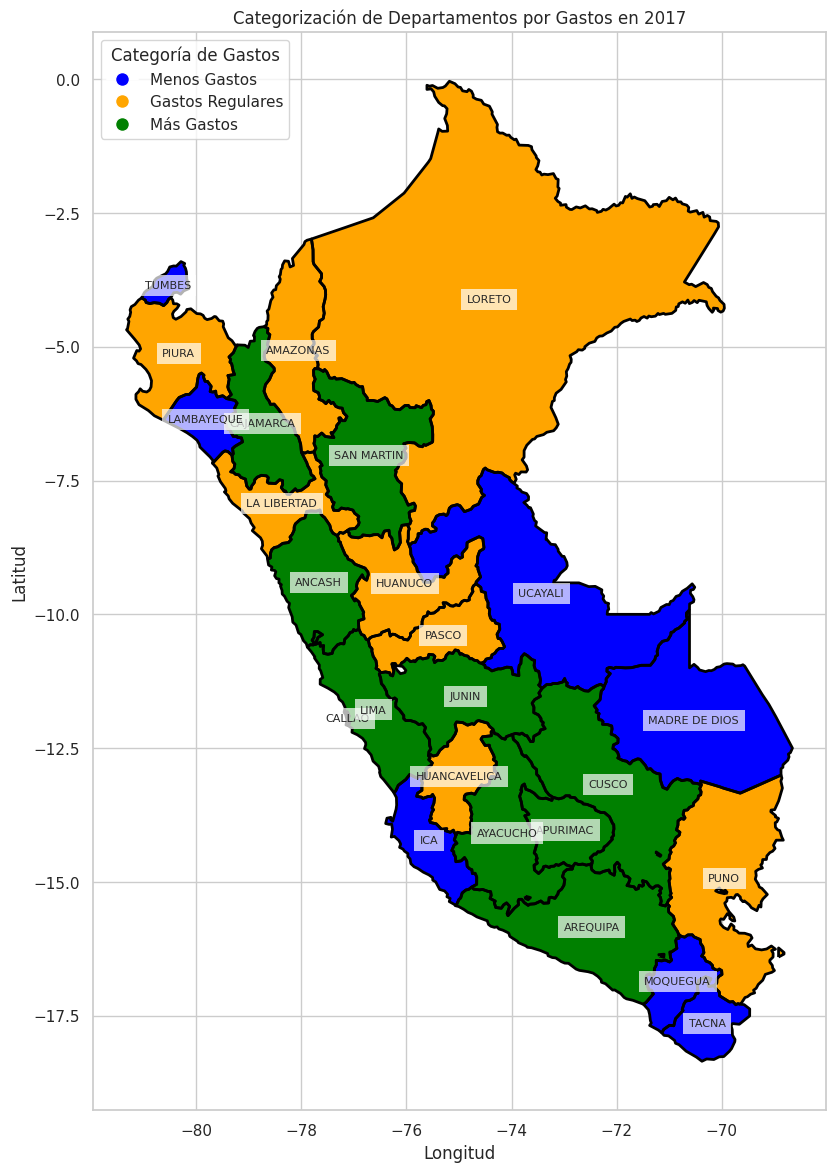

In [ ]:
# Asegurémonos de que el mes tenga dos dígitos y filtre los meses '00'
Gasto_Acum['MES_EJE'] = Gasto_Acum['MES_EJE'].astype(str).str.zfill(2)
Gasto_Acum = Gasto_Acum[Gasto_Acum['MES_EJE'] != '00']

# Creamos una columna de fecha combinando 'ANO_EJE' y 'MES_EJE'
Gasto_Acum['FECHA'] = pd.to_datetime(Gasto_Acum['ANO_EJE'].astype(str) + '-' + Gasto_Acum['MES_EJE'].astype(str), format='%Y-%m')

# Filtramos el DataFrame para el año 2017
gasto_2017 = Gasto_Acum[Gasto_Acum['FECHA'].dt.year == 2017]

# Agrupamos por departamento y sumamos los montos devengados
departamento_gasto = gasto_2017.groupby('DEPARTAMENTO_EJECUTORA_NOMBRE')['MONTO_DEVENGADO'].sum().reset_index()

# Establecemos los umbrales para la categorización
gasto_minimo = departamento_gasto['MONTO_DEVENGADO'].quantile(1/3)
gasto_regular = departamento_gasto['MONTO_DEVENGADO'].quantile(2/3)

# Creamos una nueva columna 'Categoria' basada en los montos devengados
departamento_gasto['Categoria'] = pd.cut(departamento_gasto['MONTO_DEVENGADO'],
                                         bins=[-np.inf, gasto_minimo, gasto_regular, np.inf],
                                         labels=['Menos Gastos', 'Gastos Regulares', 'Más Gastos'],
                                         right=False)

# Cargamos el Geodataset de departamental
path_departamental = '/content/drive/My Drive/BIG_DATA/GeoPandasPeru/departamental.geojson'
gdf_departamental = gpd.read_file(path_departamental)

# Fusionamos con el DataFrame Gasto_Acum
gdf_departamental = gdf_departamental.merge(departamento_gasto, left_on='NOMBDEP', right_on='DEPARTAMENTO_EJECUTORA_NOMBRE', how='left')

# Mapeamos los colores según la categoría (colores diferentes)
colors = {'Menos Gastos': 'blue', 'Gastos Regulares': 'orange', 'Más Gastos': 'green'}

# Creamos una nueva figura y ejes con fondo blanco
fig, ax = plt.subplots(figsize=(18, 14))
ax.set_facecolor('white')

# Graficamos el mapa de Perú y colorear los departamentos según la categoría
gdf_departamental.boundary.plot(ax=ax, linewidth=2, edgecolor='black')  # Líneas de límites más gruesas
for categoria, color in colors.items():
    gdf_departamental[gdf_departamental['Categoria'] == categoria].plot(ax=ax, color=color, legend=True, label=categoria)

# Agregamos nombres de departamentos con fondo blanco para mejor visibilidad
for x, y, label in zip(gdf_departamental.geometry.centroid.x, gdf_departamental.geometry.centroid.y, gdf_departamental['NOMBDEP']):
    ax.text(x, y, label, fontsize=8, ha='center', va='center', bbox=dict(facecolor='white', alpha=0.7, edgecolor='none'))

# Agregamos una leyenda manualmente
legend_entries = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10, label=categoria) for categoria, color in colors.items()]
ax.legend(handles=legend_entries, title='Categoría de Gastos', loc='upper left')

# Añadimos título y etiquetas de ejes
plt.title('Categorización de Departamentos por Gastos en 2017')
plt.xlabel('Longitud')
plt.ylabel('Latitud')

# Mostramos el gráfico
plt.show()



***2023: Informacion***



In [ ]:
# Asegurémonos de que el mes tenga dos dígitos y filtre los meses '00'
Gasto_Acum['MES_EJE'] = Gasto_Acum['MES_EJE'].astype(str).str.zfill(2)
Gasto_Acum = Gasto_Acum[Gasto_Acum['MES_EJE'] != '00']

# Creamos una columna de fecha combinando 'ANO_EJE' y 'MES_EJE'
Gasto_Acum['FECHA'] = pd.to_datetime(Gasto_Acum['ANO_EJE'].astype(str) + '-' + Gasto_Acum['MES_EJE'].astype(str), format='%Y-%m')

# Filtramos el DataFrame para el año 2023
gasto_2023 = Gasto_Acum[Gasto_Acum['FECHA'].dt.year == 2023]

# Agrupamos por departamento y sumar los montos devengados
departamento_gasto = gasto_2023.groupby('DEPARTAMENTO_EJECUTORA_NOMBRE')['MONTO_DEVENGADO'].sum().reset_index()

# Establecemos umbrales para la categorización
gasto_minimo = departamento_gasto['MONTO_DEVENGADO'].quantile(1/3)
gasto_regular = departamento_gasto['MONTO_DEVENGADO'].quantile(2/3)

# Creamos una nueva columna 'Categoria' basada en los montos devengados
departamento_gasto['Categoria'] = pd.cut(departamento_gasto['MONTO_DEVENGADO'],
                                         bins=[-np.inf, gasto_minimo, gasto_regular, np.inf],
                                         labels=['Menos Gastos', 'Gastos Regulares', 'Más Gastos'],
                                         right=False)

# Mostramos las categorías y los nombres de los departamentos
print("Departamentos con Menos Gastos:")
print(departamento_gasto[departamento_gasto['Categoria'] == 'Menos Gastos']['DEPARTAMENTO_EJECUTORA_NOMBRE'].tolist())

print("\nDepartamentos con Gastos Regulares:")
print(departamento_gasto[departamento_gasto['Categoria'] == 'Gastos Regulares']['DEPARTAMENTO_EJECUTORA_NOMBRE'].tolist())

print("\nDepartamentos con Más Gastos:")
print(departamento_gasto[departamento_gasto['Categoria'] == 'Más Gastos']['DEPARTAMENTO_EJECUTORA_NOMBRE'].tolist())


Departamentos con Menos Gastos:
['ICA', 'LA LIBERTAD', 'LAMBAYEQUE', 'MOQUEGUA', 'PASCO', 'PUNO', 'TACNA', 'TUMBES']

Departamentos con Gastos Regulares:
['AMAZONAS', 'APURIMAC', 'AREQUIPA', 'CAJAMARCA', 'HUANCAVELICA', 'JUNIN', 'PIURA', 'PROVINCIA CONSTITUCIONAL DEL CALLAO']

Departamentos con Más Gastos:
['ANCASH', 'AYACUCHO', 'CUSCO', 'HUANUCO', 'LIMA', 'LORETO', 'MADRE DE DIOS', 'SAN MARTIN', 'UCAYALI']


***Grafico: ***

<ipython-input-126-bc1e687ba950>:44: UserWarning:

Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.




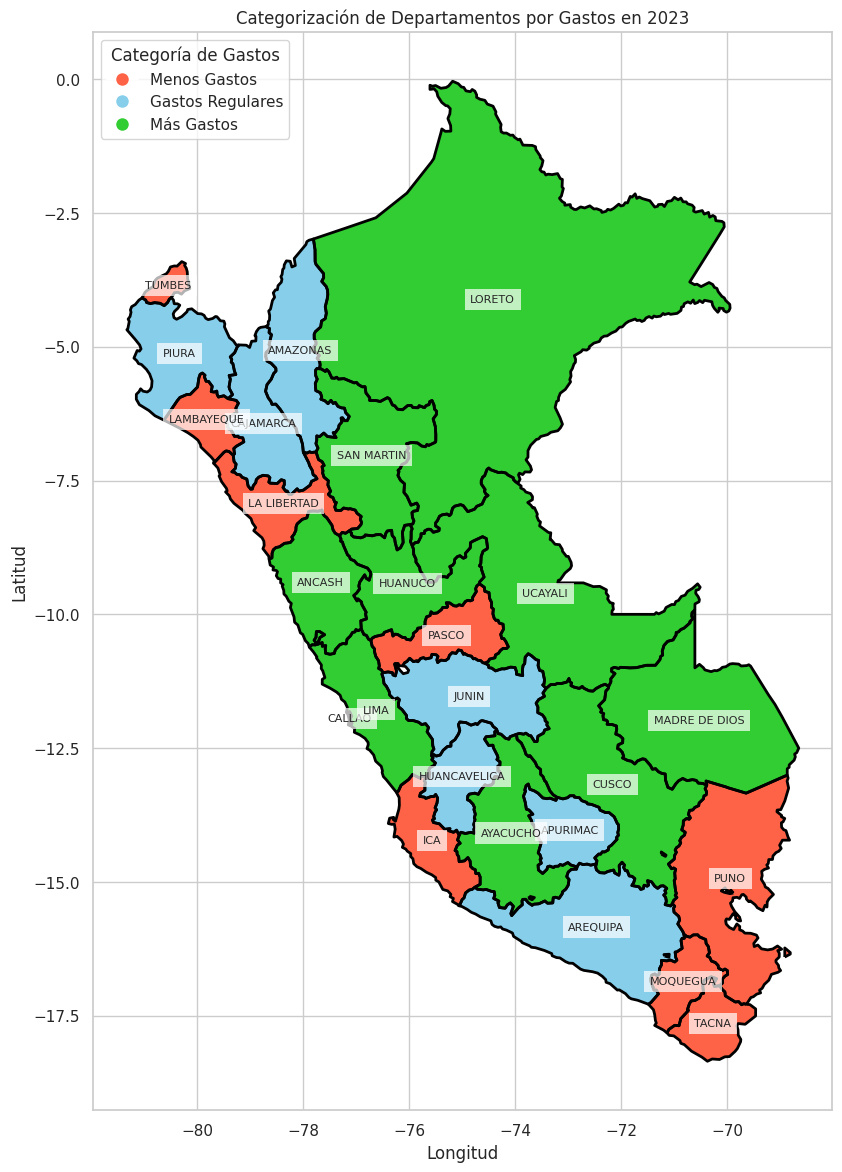

In [ ]:
# Asegurémonos de que el mes tenga dos dígitos y filtre los meses '00'
Gasto_Acum['MES_EJE'] = Gasto_Acum['MES_EJE'].astype(str).str.zfill(2)
Gasto_Acum = Gasto_Acum[Gasto_Acum['MES_EJE'] != '00']

# Creamos una columna de fecha combinando 'ANO_EJE' y 'MES_EJE'
Gasto_Acum['FECHA'] = pd.to_datetime(Gasto_Acum['ANO_EJE'].astype(str) + '-' + Gasto_Acum['MES_EJE'].astype(str), format='%Y-%m')

# Filtramos el DataFrame para el año 2023
gasto_2023 = Gasto_Acum[Gasto_Acum['FECHA'].dt.year == 2023]

# Agrupamos por departamento y sumamos los montos devengados
departamento_gasto = gasto_2023.groupby('DEPARTAMENTO_EJECUTORA_NOMBRE')['MONTO_DEVENGADO'].sum().reset_index()

# Establecemos los umbrales para la categorización
gasto_minimo = departamento_gasto['MONTO_DEVENGADO'].quantile(1/3)
gasto_regular = departamento_gasto['MONTO_DEVENGADO'].quantile(2/3)

# Creamos una nueva columna 'Categoria' basada en los montos devengados
departamento_gasto['Categoria'] = pd.cut(departamento_gasto['MONTO_DEVENGADO'],
                                         bins=[-np.inf, gasto_minimo, gasto_regular, np.inf],
                                         labels=['Menos Gastos', 'Gastos Regulares', 'Más Gastos'],
                                         right=False)

# Cargamos el Geodataset de departamental
path_departamental = '/content/drive/My Drive/BIG_DATA/GeoPandasPeru/departamental.geojson'
gdf_departamental = gpd.read_file(path_departamental)

# Fusionamos con el DataFrame Gasto_Acum
gdf_departamental = gdf_departamental.merge(departamento_gasto, left_on='NOMBDEP', right_on='DEPARTAMENTO_EJECUTORA_NOMBRE', how='left')

# Mapeamos los colores según la categoría (colores diferentes)
colors = {'Menos Gastos': '#FF6347', 'Gastos Regulares': '#87CEEB', 'Más Gastos': '#32CD32'}

# Creamos una nueva figura y ejes con fondo blanco
fig, ax = plt.subplots(figsize=(18, 14))
ax.set_facecolor('white')

# Graficamos el mapa de Perú y colorear los departamentos según la categoría
gdf_departamental.boundary.plot(ax=ax, linewidth=2, edgecolor='black')  # Líneas de límites más gruesas
for categoria, color in colors.items():
    gdf_departamental[gdf_departamental['Categoria'] == categoria].plot(ax=ax, color=color, legend=True, label=categoria)

# Agregamos nombres de departamentos con fondo blanco para mejor visibilidad
for x, y, label in zip(gdf_departamental.geometry.centroid.x, gdf_departamental.geometry.centroid.y, gdf_departamental['NOMBDEP']):
    ax.text(x, y, label, fontsize=8, ha='center', va='center', bbox=dict(facecolor='white', alpha=0.7, edgecolor='none'))

# Agregamos una leyenda manualmente
legend_entries = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10, label=categoria) for categoria, color in colors.items()]
ax.legend(handles=legend_entries, title='Categoría de Gastos', loc='upper left')

# Añadimos título y etiquetas de ejes
plt.title('Categorización de Departamentos por Gastos en 2023')
plt.xlabel('Longitud')
plt.ylabel('Latitud')

# Mostramos el gráfico
plt.show()

# ***Primero vamos a buscar la informacion del departamento con mas y menos gastos desde el 2014 hasta el 2023:***

***Con mas gasto***

In [ ]:
# Agrupamos por departamento y sumamos los montos devengados para todos los años
gasto_total_departamento = Gasto_Acum.groupby('DEPARTAMENTO_EJECUTORA_NOMBRE')['MONTO_DEVENGADO'].sum().reset_index()

# Encontramos el departamento con más gastos
departamento_max_gastos = gasto_total_departamento.loc[gasto_total_departamento['MONTO_DEVENGADO'].idxmax()]

# Mostramos la información
print(f"Departamento con más gastos desde 2014 hasta 2023:")
print(f"Departamento: {departamento_max_gastos['DEPARTAMENTO_EJECUTORA_NOMBRE']}")
print(f"Monto total devengado: {departamento_max_gastos['MONTO_DEVENGADO']}")


Departamento con más gastos desde 2014 hasta 2023:
Departamento: LIMA
Monto total devengado: 2934033738.51


***Con menos gasto***

In [ ]:
# Encontramos el departamento con menos gastos
departamento_min_gastos = gasto_total_departamento.loc[gasto_total_departamento['MONTO_DEVENGADO'].idxmin()]

# Mostramos la información
print(f"\nDepartamento con menos gastos desde 2014 hasta 2023:")
print(f"Departamento: {departamento_min_gastos['DEPARTAMENTO_EJECUTORA_NOMBRE']}")
print(f"Monto total devengado: {departamento_min_gastos['MONTO_DEVENGADO']}")



Departamento con menos gastos desde 2014 hasta 2023:
Departamento: MOQUEGUA
Monto total devengado: 22441039.38


***Graficamos el año 2014 de los departamentos y sus gastos:***

In [ ]:
# Filtramos el DataFrame para el año 2014
gasto_2014 = Gasto_Acum[Gasto_Acum['FECHA'].dt.year == 2014]

# Agrupamos por departamento y sumar los montos devengados
gasto_departamento_2014 = gasto_2014.groupby('DEPARTAMENTO_EJECUTORA_NOMBRE')['MONTO_DEVENGADO'].sum().reset_index()

# Ordenamos por monto devengado de mayor a menor
gasto_departamento_2014 = gasto_departamento_2014.sort_values(by='MONTO_DEVENGADO', ascending=False)

# Creamos gráfico interactivo con Plotly Express
fig = px.bar(gasto_departamento_2014,
             x='DEPARTAMENTO_EJECUTORA_NOMBRE',
             y='MONTO_DEVENGADO',
             color='MONTO_DEVENGADO',
             color_continuous_scale='viridis',
             labels={'MONTO_DEVENGADO': 'Monto Devengado'},
             title='Gasto por Departamento en el Año 2014')

# Personalizamos el diseño
fig.update_layout(xaxis_title='Departamento', yaxis_title='Monto Devengado', xaxis_tickangle=-45)

# Mostramos el gráfico interactivo
fig.show()

***Graficamos el año 2017 de los departamentos y sus gastos:***

In [ ]:
# Filtramos el DataFrame para el año 2017
gasto_2017 = Gasto_Acum[Gasto_Acum['FECHA'].dt.year == 2017]

# Agrupamos por departamento y sumar los montos devengados
gasto_departamento_2017 = gasto_2017.groupby('DEPARTAMENTO_EJECUTORA_NOMBRE')['MONTO_DEVENGADO'].sum().reset_index()

# Ordenamos por monto devengado de mayor a menor
gasto_departamento_2017 = gasto_departamento_2017.sort_values(by='MONTO_DEVENGADO', ascending=False)

# Creamos gráfico interactivo con Plotly Express y colores diferentes
fig = px.bar(gasto_departamento_2017,
             x='DEPARTAMENTO_EJECUTORA_NOMBRE',
             y='MONTO_DEVENGADO',
             color='MONTO_DEVENGADO',
             color_continuous_scale='reds_r',  # Cambiar a 'reds_r' para invertir la paleta
             labels={'MONTO_DEVENGADO': 'Monto Devengado'},
             title='Gasto por Departamento en el Año 2017')

# Personalizamos el diseño
fig.update_layout(xaxis_title='Departamento', yaxis_title='Monto Devengado', xaxis_tickangle=-45)

# Mostramos el gráfico interactivo
fig.show()



***Graficamos el año 2023 de los departamentos y sus gastos:***

In [ ]:
# Filtramos el DataFrame para el año 2023
gasto_2023 = Gasto_Acum[Gasto_Acum['FECHA'].dt.year == 2023]

# Agrupamos por departamento y sumar los montos devengados
gasto_departamento_2023 = gasto_2023.groupby('DEPARTAMENTO_EJECUTORA_NOMBRE')['MONTO_DEVENGADO'].sum().reset_index()

# Ordenamos por monto devengado de mayor a menor
gasto_departamento_2023 = gasto_departamento_2023.sort_values(by='MONTO_DEVENGADO', ascending=False)

# Creamos gráfico interactivo con Plotly Express y colores diferentes (sin blanco)
fig = px.bar(gasto_departamento_2023,
             x='DEPARTAMENTO_EJECUTORA_NOMBRE',
             y='MONTO_DEVENGADO',
             color='MONTO_DEVENGADO',
             color_continuous_scale=px.colors.sequential.Blues[2:],  # Slice desde el tercer color para evitar el blanco
             labels={'MONTO_DEVENGADO': 'Monto Devengado'},
             title='Gasto por Departamento en el Año 2023')

# Personalizamos el diseño
fig.update_layout(xaxis_title='Departamento', yaxis_title='Monto Devengado', xaxis_tickangle=-45)

# Mostramos el gráfico interactivo
fig.show()



# ***Objetivo 1: Evaluar la variación anual del gasto en adaptación al cambio climático en el período de 2014 a 2023.***

***Ahora vemos la variacion de gastos por cada año***

In [ ]:
# Agrupar por año y sumar los montos devengados
gasto_anual = Gasto_Acum.groupby('ANO_EJE')['MONTO_DEVENGADO'].sum().reset_index()

# Calcular la variación anual
gasto_anual['Variacion_Anual'] = gasto_anual['MONTO_DEVENGADO'].diff()

# Visualizar la variación anual
print(gasto_anual[['ANO_EJE', 'Variacion_Anual']])


   ANO_EJE  Variacion_Anual
0     2014              NaN
1     2015     9.281892e+07
2     2016     4.961524e+07
3     2017     3.007614e+08
4     2018    -1.727188e+07
5     2019    -1.358901e+07
6     2020    -7.069246e+08
7     2021    -3.776244e+07
8     2022     7.284117e+07
9     2023    -4.920083e+07


***Graficamos:***

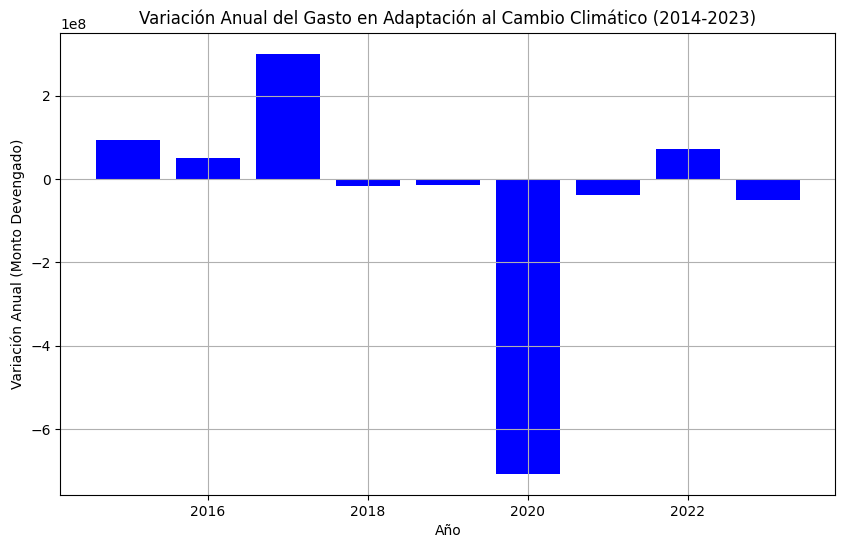

In [ ]:
# Agrupar por año y sumar los montos devengados
gasto_anual = Gasto_Acum.groupby('ANO_EJE')['MONTO_DEVENGADO'].sum().reset_index()

# Calcular la variación anual
gasto_anual['Variacion_Anual'] = gasto_anual['MONTO_DEVENGADO'].diff()

# Graficar la variación anual
plt.figure(figsize=(10, 6))
plt.bar(gasto_anual['ANO_EJE'], gasto_anual['Variacion_Anual'], color='blue')
plt.title('Variación Anual del Gasto en Adaptación al Cambio Climático (2014-2023)')
plt.xlabel('Año')
plt.ylabel('Variación Anual (Monto Devengado)')
plt.grid(True)
plt.show()

In [ ]:
# Obtener la lista única de categorías de gasto en todo el DataFrame
categorias_gasto_unicas = Gasto_Acum['CATEGORIA_GASTO_NOMBRE'].unique()

# Mostrar la lista de categorías de gasto únicas
print("Categorías de Gasto Únicas:")
print(categorias_gasto_unicas)

Categorías de Gasto Únicas:
['GASTO CORRIENTE' 'GASTO DE CAPITAL']


# ***Categoria de Gasto Por Regiones:***

***Costa:***

In [ ]:

# Lista para almacenar los resultados
resultados = []

# Iterar sobre cada año
for año in range(2014, 2024):
    # Filtrar el DataFrame para el año específico
    gasto_año = Gasto_Acum[Gasto_Acum['ANO_EJE'] == año]

    # Obtener el departamento más utilizado
    departamento_mas_utilizado = gasto_año['DEPARTAMENTO_EJECUTORA_NOMBRE'].value_counts().idxmax()

    # Obtener la categoría de gasto más utilizada
    categoria_gasto_mas_utilizada = gasto_año['CATEGORIA_GASTO_NOMBRE'].value_counts().idxmax()

    # Almacenar los resultados en la lista
    resultados.append({
        'ANO_EJE': año,
        'DEPARTAMENTO_MAS_UTILIZADO': departamento_mas_utilizado,
        'CATEGORIA_GASTO_MAS_UTILIZADA': categoria_gasto_mas_utilizada
    })

# Crear un DataFrame a partir de la lista de resultados
resultados_df = pd.DataFrame(resultados)

# Mostrar el DataFrame resultante
print(resultados_df)


   ANO_EJE DEPARTAMENTO_MAS_UTILIZADO CATEGORIA_GASTO_MAS_UTILIZADA
0     2014                       LIMA               GASTO CORRIENTE
1     2015                       LIMA               GASTO CORRIENTE
2     2016                       LIMA               GASTO CORRIENTE
3     2017                       LIMA               GASTO CORRIENTE
4     2018                       LIMA               GASTO CORRIENTE
5     2019                       LIMA               GASTO CORRIENTE
6     2020                       LIMA               GASTO CORRIENTE
7     2021                       LIMA               GASTO CORRIENTE
8     2022                       LIMA               GASTO CORRIENTE
9     2023                       LIMA               GASTO CORRIENTE


***Graficas***

<ipython-input-18-d8acc688f7a0>:23: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  ax.legend()


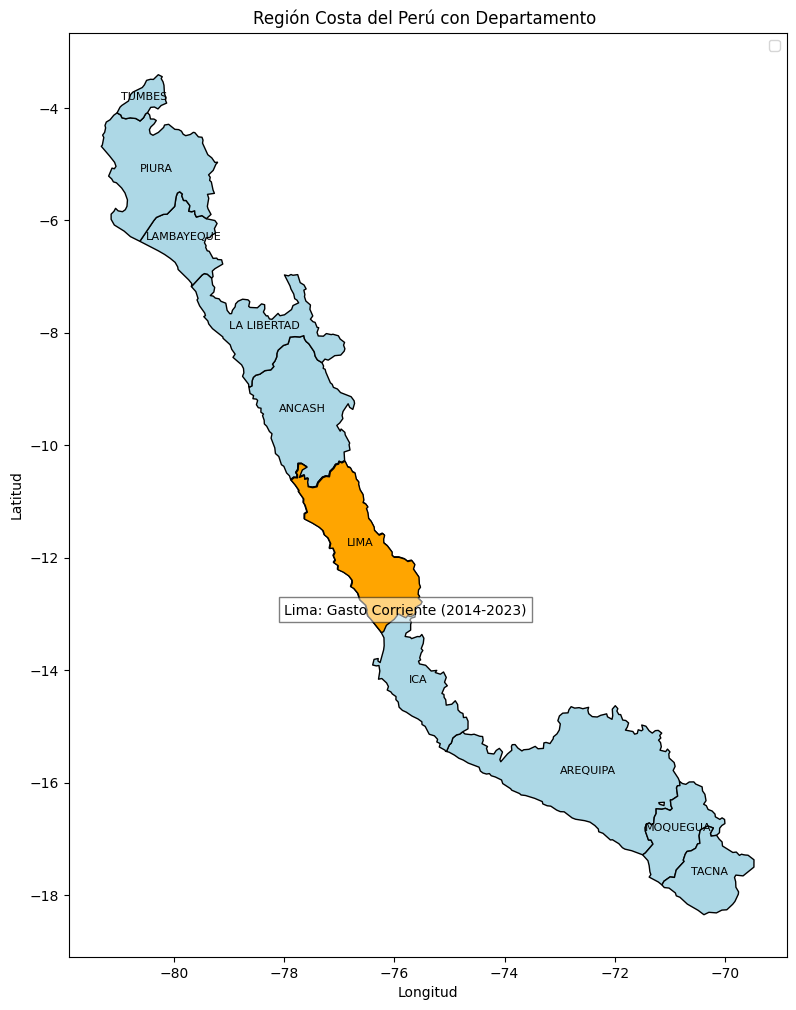

In [ ]:
# Lista de departamentos de la región Costa
region_costa_departamentos = ['TUMBES', 'PIURA', 'LAMBAYEQUE', 'LA LIBERTAD', 'ANCASH', 'LIMA', 'ICA', 'AREQUIPA', 'MOQUEGUA', 'TACNA']

# Filtrar el GeoDataFrame para obtener solo los departamentos de la región Costa
region_costa_geometry = gdf_departamental[gdf_departamental['NOMBDEP'].isin(region_costa_departamentos)]

# Configurar el tamaño de la figura
fig, ax = plt.subplots(figsize=(12, 12))

# Graficar la región Costa con un color único
region_costa_geometry.plot(ax=ax, color='lightblue', edgecolor='black')

# Resaltar el departamento de Lima con el color original
lima_geometry = gdf_departamental[gdf_departamental['NOMBDEP'] == 'LIMA']
lima_geometry.plot(ax=ax, color='orange', edgecolor='black', label='Lima')

# Configurar etiquetas y título
ax.set_xlabel('Longitud')
ax.set_ylabel('Latitud')
ax.set_title('Región Costa del Perú con Departamento ')

# Mostrar la leyenda
ax.legend()

# Añadir texto de referencia sobre la categoría de gasto utilizada por Lima
ax.text(-78, -13, 'Lima: Gasto Corriente (2014-2023)', fontsize=10, bbox=dict(facecolor='white', alpha=0.5))

# Añadir etiquetas para los departamentos
for _, row in region_costa_geometry.iterrows():
    plt.annotate(row['NOMBDEP'], (row['geometry'].centroid.x, row['geometry'].centroid.y), color='black', fontsize=8, ha='center')

# Mostrar la gráfica
plt.show()

***SIERRA:***

In [ ]:
# Lista de departamentos de la región Sierra
region_sierra_departamentos = ['CAJAMARCA', 'LA LIBERTAD', 'HUANUCO', 'PASCO', 'JUNIN', 'HUANCAVELICA', 'AYACUCHO', 'CUSCO', 'PUNO']

# Lista para almacenar los resultados
resultados_sierra = []

# Iterar sobre cada año
for año in range(2014, 2024):
    # Filtrar el DataFrame para el año específico y departamentos de la región Sierra
    gasto_año_sierra = Gasto_Acum[(Gasto_Acum['ANO_EJE'] == año) & (Gasto_Acum['DEPARTAMENTO_EJECUTORA_NOMBRE'].isin(region_sierra_departamentos))]

    # Obtener el departamento más utilizado en la región Sierra
    departamento_mas_utilizado_sierra = gasto_año_sierra['DEPARTAMENTO_EJECUTORA_NOMBRE'].value_counts().idxmax()

    # Obtener la categoría de gasto más utilizada en la región Sierra
    categoria_gasto_mas_utilizada_sierra = gasto_año_sierra['CATEGORIA_GASTO_NOMBRE'].value_counts().idxmax()

    # Almacenar los resultados en la lista
    resultados_sierra.append({
        'ANO_EJE': año,
        'DEPARTAMENTO_MAS_UTILIZADO_SIERRA': departamento_mas_utilizado_sierra,
        'CATEGORIA_GASTO_MAS_UTILIZADA_SIERRA': categoria_gasto_mas_utilizada_sierra
    })

# Crear un DataFrame a partir de la lista de resultados para la región Sierra
resultados_sierra_df = pd.DataFrame(resultados_sierra)

# Mostrar el DataFrame resultante
print(resultados_sierra_df)

   ANO_EJE DEPARTAMENTO_MAS_UTILIZADO_SIERRA  \
0     2014                             CUSCO   
1     2015                             CUSCO   
2     2016                             CUSCO   
3     2017                             CUSCO   
4     2018                             CUSCO   
5     2019                             CUSCO   
6     2020                             CUSCO   
7     2021                             CUSCO   
8     2022                             CUSCO   
9     2023                             CUSCO   

  CATEGORIA_GASTO_MAS_UTILIZADA_SIERRA  
0                      GASTO CORRIENTE  
1                      GASTO CORRIENTE  
2                      GASTO CORRIENTE  
3                      GASTO CORRIENTE  
4                      GASTO CORRIENTE  
5                      GASTO CORRIENTE  
6                      GASTO CORRIENTE  
7                      GASTO CORRIENTE  
8                      GASTO CORRIENTE  
9                      GASTO CORRIENTE  


<ipython-input-29-d60163d9a698>:23: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  ax.legend()


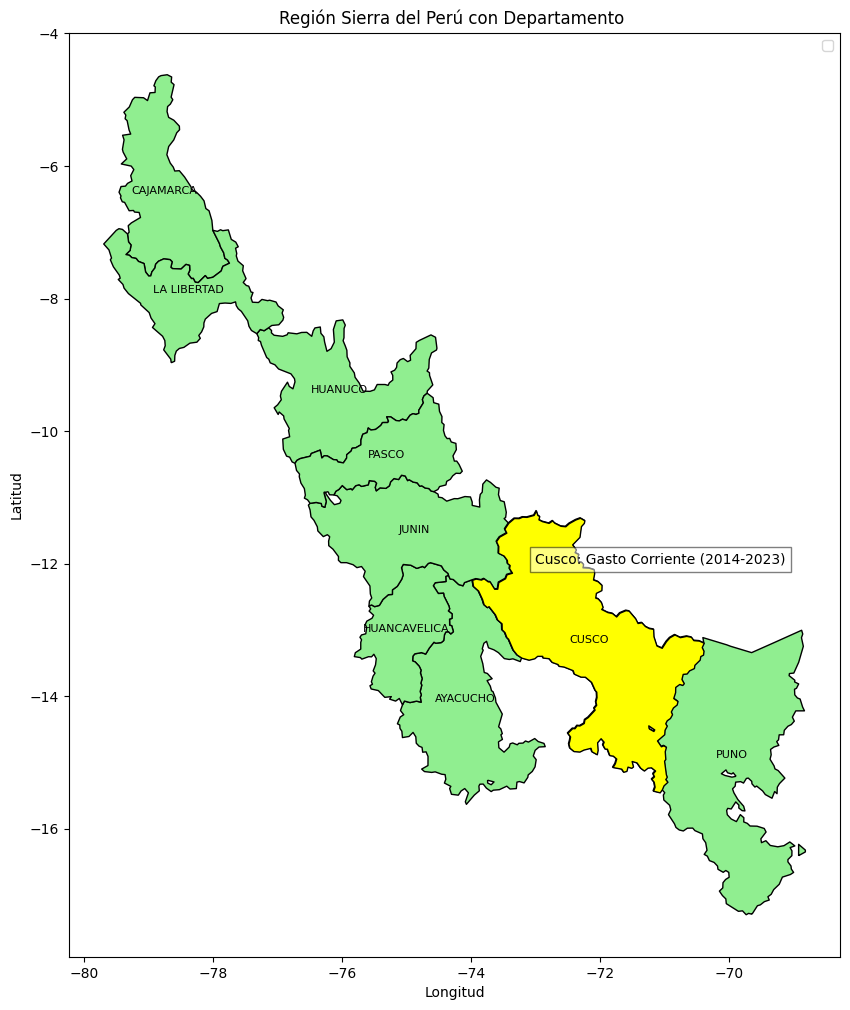

In [ ]:
# Lista de departamentos de la región Sierra
region_sierra_departamentos = ['CAJAMARCA', 'LA LIBERTAD', 'HUANUCO', 'PASCO', 'JUNIN', 'HUANCAVELICA', 'AYACUCHO', 'CUSCO', 'PUNO']

# Filtrar el GeoDataFrame para obtener solo los departamentos de la región Sierra
region_sierra_geometry = gdf_departamental[gdf_departamental['NOMBDEP'].isin(region_sierra_departamentos)]

# Configurar el tamaño de la figura
fig, ax = plt.subplots(figsize=(12, 12))

# Graficar la región Sierra con un color único
region_sierra_geometry.plot(ax=ax, color='lightgreen', edgecolor='black')

# Resaltar el departamento de Lima con el color original
lima_geometry = gdf_departamental[gdf_departamental['NOMBDEP'] == 'CUSCO']
lima_geometry.plot(ax=ax, color='yellow', edgecolor='black', label='Cusco')

# Configurar etiquetas y título
ax.set_xlabel('Longitud')
ax.set_ylabel('Latitud')
ax.set_title('Región Sierra del Perú con Departamento ')

# Mostrar la leyenda
ax.legend()

# Añadir texto de referencia sobre la categoría de gasto utilizada por Lima
ax.text(-73, -12, 'Cusco: Gasto Corriente (2014-2023)', fontsize=10, bbox=dict(facecolor='white', alpha=0.5))

# Añadir etiquetas para los departamentos
for _, row in region_sierra_geometry.iterrows():
    plt.annotate(row['NOMBDEP'], (row['geometry'].centroid.x, row['geometry'].centroid.y), color='black', fontsize=8, ha='center')

# Mostrar la gráfica
plt.show()


***SELVA:***

In [ ]:
# Lista de departamentos de la región Selva
region_selva_departamentos = ['LORETO', 'AMAZONAS', 'SAN MARTIN', 'UCAYALI', 'MADRE DE DIOS']

# Lista para almacenar los resultados
resultados_selva = []

# Iterar sobre cada año
for año in range(2014, 2024):
    # Filtrar el DataFrame para el año específico y departamentos de la región Selva
    gasto_año_selva = Gasto_Acum[(Gasto_Acum['ANO_EJE'] == año) & (Gasto_Acum['DEPARTAMENTO_EJECUTORA_NOMBRE'].isin(region_selva_departamentos))]

    # Obtener el departamento con el mayor gasto en la región Selva
    departamento_mayor_gasto_selva = gasto_año_selva.groupby('DEPARTAMENTO_EJECUTORA_NOMBRE')['MONTO_DEVENGADO'].sum().idxmax()

    # Obtener la categoría de gasto más utilizada en la región Selva
    categoria_gasto_mayor_utilizada_selva = gasto_año_selva['CATEGORIA_GASTO_NOMBRE'].value_counts().idxmax()

    # Almacenar los resultados en la lista
    resultados_selva.append({
        'ANO_EJE': año,
        'DEPARTAMENTO_MAYOR_GASTO_SELVA': departamento_mayor_gasto_selva,
        'CATEGORIA_GASTO_MAS_UTILIZADA_SELVA': categoria_gasto_mayor_utilizada_selva
    })

# Crear un DataFrame a partir de la lista de resultados para la región Selva
resultados_selva_df = pd.DataFrame(resultados_selva)

# Mostrar el DataFrame resultante
print(resultados_selva_df)


   ANO_EJE DEPARTAMENTO_MAYOR_GASTO_SELVA CATEGORIA_GASTO_MAS_UTILIZADA_SELVA
0     2014                         LORETO                     GASTO CORRIENTE
1     2015                         LORETO                     GASTO CORRIENTE
2     2016                         LORETO                     GASTO CORRIENTE
3     2017                     SAN MARTIN                     GASTO CORRIENTE
4     2018                         LORETO                     GASTO CORRIENTE
5     2019                     SAN MARTIN                     GASTO CORRIENTE
6     2020                         LORETO                     GASTO CORRIENTE
7     2021                         LORETO                     GASTO CORRIENTE
8     2022                         LORETO                     GASTO CORRIENTE
9     2023                         LORETO                     GASTO CORRIENTE


<ipython-input-42-3545e545417b>:32: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  ax.legend()


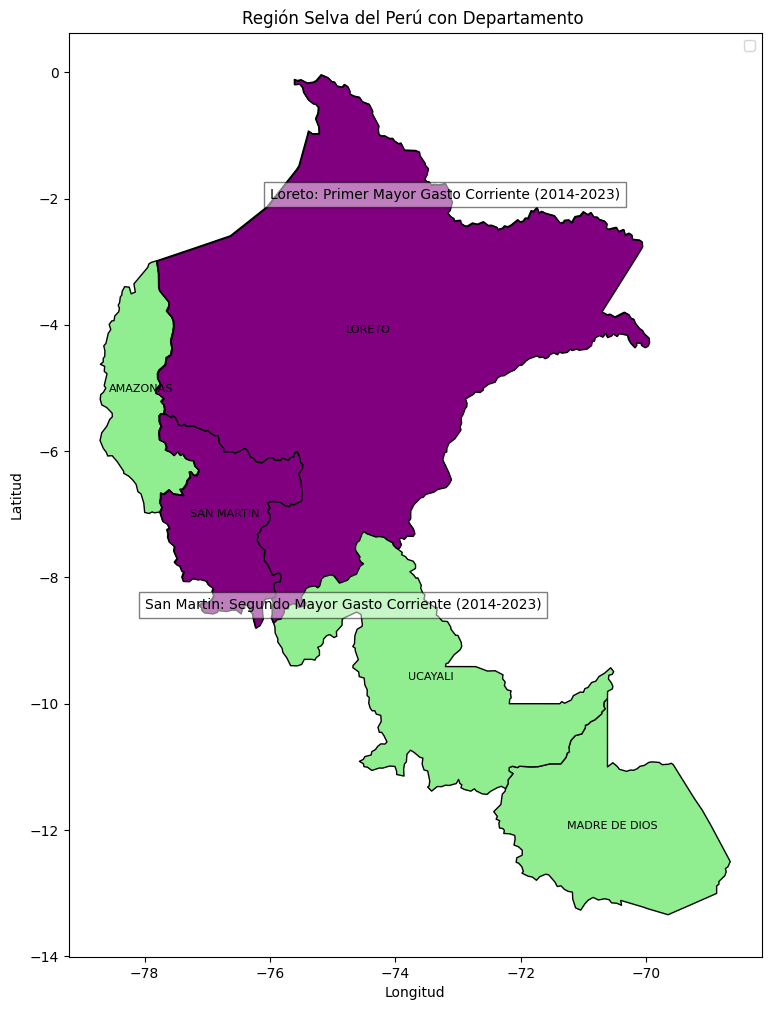

In [ ]:
# Lista de departamentos de la región Sierra
region_selva_departamentos = ['LORETO', 'AMAZONAS', 'SAN MARTIN', 'UCAYALI', 'MADRE DE DIOS']

# Filtrar el GeoDataFrame para obtener solo los departamentos de la región Selva
region_selva_geometry = gdf_departamental[gdf_departamental['NOMBDEP'].isin(region_selva_departamentos)]

# Configurar el tamaño de la figura
fig, ax = plt.subplots(figsize=(12, 12))

# Graficar la región selva con un color único
region_selva_geometry.plot(ax=ax, color='lightgreen', edgecolor='black')

# Resaltar el departamento de Loreto y San Martin con el color original
lima_geometry = gdf_departamental[gdf_departamental['NOMBDEP'] == 'LORETO']
lima_geometry.plot(ax=ax, color='purple', edgecolor='black', label='Loreto')

lima_geometry = gdf_departamental[gdf_departamental['NOMBDEP'] == 'SAN MARTIN']
lima_geometry.plot(ax=ax, color='purple', edgecolor='black', label='San Martin')

# Configurar etiquetas y título
ax.set_xlabel('Longitud')
ax.set_ylabel('Latitud')
ax.set_title('Región Selva del Perú con Departamento ')

# Añadir texto de referencia sobre la categoría de gasto utilizada por Lima
ax.text(-76, -2, 'Loreto: Primer Mayor Gasto Corriente (2014-2023)', fontsize=10, bbox=dict(facecolor='white', alpha=0.5))

# Añadir texto de referencia sobre la categoría de gasto utilizada por Lima
ax.text(-78, -8.5, 'San Martin: Segundo Mayor Gasto Corriente (2014-2023)', fontsize=10, bbox=dict(facecolor='white', alpha=0.5))

# Mostrar la leyenda
ax.legend()

# Añadir etiquetas para los departamentos
for _, row in region_selva_geometry.iterrows():
    plt.annotate(row['NOMBDEP'], (row['geometry'].centroid.x, row['geometry'].centroid.y), color='black', fontsize=8, ha='center')

# Mostrar la gráfica
plt.show()

In [ ]:
# Visualizar las primeras filas del GeoDataFrame
print(gdf_departamental.head(24))

# Obtener la lista de columnas
columnas_gdf = gdf_departamental.columns
print(columnas_gdf)

          NOMBDEP  COUNT FIRST_IDDP      HECTARES  \
0        AMAZONAS     84         01  3.930647e+06   
1          ANCASH    166         02  3.596225e+06   
2        APURIMAC     80         03  2.111415e+06   
3        AREQUIPA    109         04  6.325589e+06   
4        AYACUCHO    111         05  4.350382e+06   
5       CAJAMARCA    127         06  3.304466e+06   
6          CALLAO      6         07  1.414095e+04   
7           CUSCO    108         08  7.207614e+06   
8    HUANCAVELICA     94         09  2.206504e+06   
9         HUANUCO     76         10  3.720053e+06   
10            ICA     43         11  2.108077e+06   
11          JUNIN    123         12  4.399729e+06   
12    LA LIBERTAD     83         13  2.529597e+06   
13     LAMBAYEQUE     38         14  1.434231e+06   
14           LIMA    171         15  3.498999e+06   
15         LORETO     51         16  3.751160e+07   
16  MADRE DE DIOS     11         17  8.504587e+06   
17       MOQUEGUA     20         18  1.580731e

# ***Informacion de gastos a nivel de gobiernos:***

In [ ]:
# Filtrar el DataFrame para los años 2014 a 2023
gasto_adaptacion = Gasto_Acum[(Gasto_Acum['FECHA'].dt.year >= 2014) & (Gasto_Acum['FECHA'].dt.year <= 2023)]

# Calcular el gasto total por nivel de gobierno
gasto_por_nivel = gasto_adaptacion.groupby(['NIVEL_GOBIERNO', 'NIVEL_GOBIERNO_NOMBRE'])['MONTO_DEVENGADO'].sum()

print(gasto_por_nivel )


NIVEL_GOBIERNO  NIVEL_GOBIERNO_NOMBRE
E               GOBIERNO NACIONAL        2.906404e+09
M               GOBIERNOS LOCALES        2.492260e+09
R               GOBIERNOS REGIONALES     1.381988e+09
Name: MONTO_DEVENGADO, dtype: float64


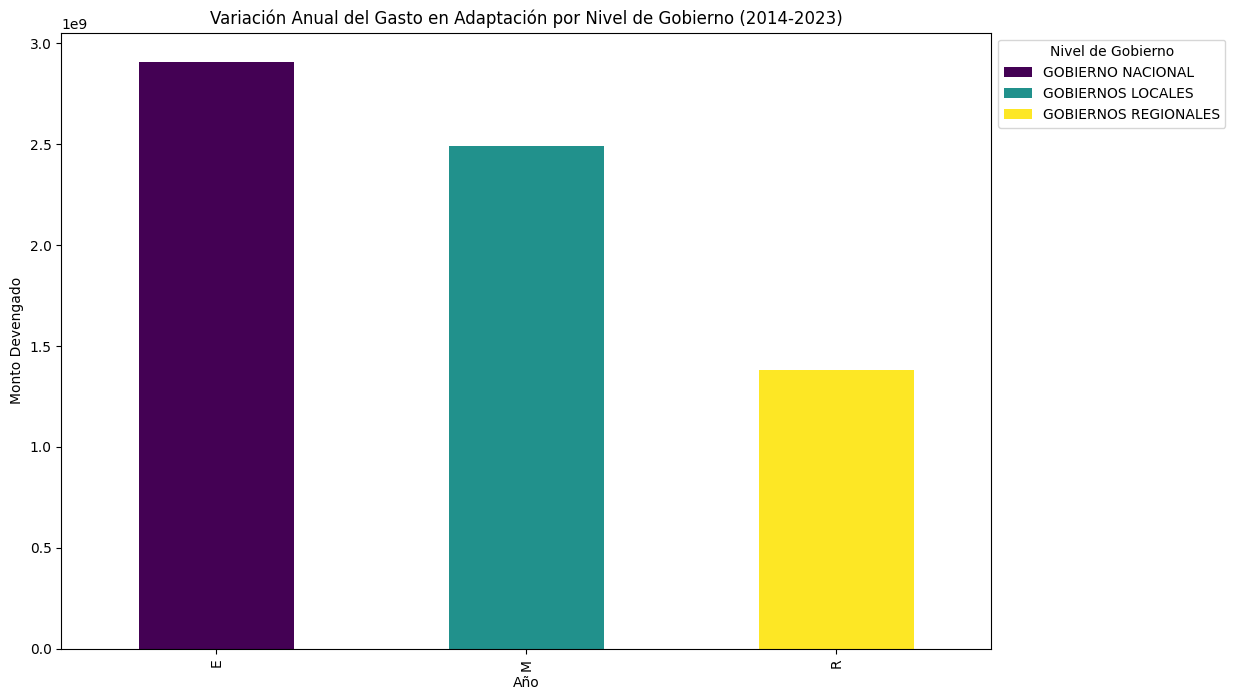

In [ ]:
# Filtrar el DataFrame para los años 2014 a 2023
gasto_adaptacion = Gasto_Acum[(Gasto_Acum['FECHA'].dt.year >= 2014) & (Gasto_Acum['FECHA'].dt.year <= 2023)]

# Calcular el gasto total por nivel de gobierno
gasto_por_nivel = gasto_adaptacion.groupby(['NIVEL_GOBIERNO', 'NIVEL_GOBIERNO_NOMBRE'])['MONTO_DEVENGADO'].sum()

# Graficar la variación anual del gasto en adaptación por nivel de gobierno
fig, ax = plt.subplots(figsize=(12, 8))
gasto_por_nivel.unstack().plot(kind='bar', stacked=True, colormap='viridis', ax=ax)
plt.title('Variación Anual del Gasto en Adaptación por Nivel de Gobierno (2014-2023)')
plt.xlabel('Año')
plt.ylabel('Monto Devengado')
plt.legend(title='Nivel de Gobierno', loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

# ***Programas y gastos utilizado para cada año***

In [ ]:
# Iterar por cada año
for year in range(2014, 2024):
    # Filtrar el DataFrame para el año específico
    gasto_por_programa_anio = Gasto_Acum[Gasto_Acum['ANO_EJE'] == year]

    # Calcular el gasto total por programa
    gasto_por_programa_anio = gasto_por_programa_anio.groupby(['PROGRAMA_PPTO', 'PROGRAMA_PPTO_NOMBRE'])['MONTO_DEVENGADO'].sum().reset_index()

    # Obtener los dos programas más utilizados
    programas_mas_utilizados = gasto_por_programa_anio.nlargest(2, 'MONTO_DEVENGADO')

    # Mostrar la información
    print(f'\nAño: {year}')
    print(programas_mas_utilizados[['PROGRAMA_PPTO_NOMBRE', 'MONTO_DEVENGADO']])




Año: 2014
                                 PROGRAMA_PPTO_NOMBRE  MONTO_DEVENGADO
21  ASIGNACIONES PRESUPUESTARIAS QUE NO RESULTAN E...     1.530662e+08
3                GESTION INTEGRAL DE RESIDUOS SOLIDOS     9.185686e+07

Año: 2015
                                 PROGRAMA_PPTO_NOMBRE  MONTO_DEVENGADO
25  ASIGNACIONES PRESUPUESTARIAS QUE NO RESULTAN E...     1.521020e+08
0                 ENFERMEDADES METAXENICAS Y ZOONOSIS     9.599474e+07

Año: 2016
                      PROGRAMA_PPTO_NOMBRE  MONTO_DEVENGADO
14  PROGRAMA NACIONAL DE SANEAMIENTO RURAL     1.893678e+08
0      ENFERMEDADES METAXENICAS Y ZOONOSIS     9.342510e+07

Año: 2017
                       PROGRAMA_PPTO_NOMBRE  MONTO_DEVENGADO
14   PROGRAMA NACIONAL DE SANEAMIENTO RURAL     3.134899e+08
13  PROGRAMA NACIONAL DE SANEAMIENTO URBANO     1.438483e+08

Año: 2018
                       PROGRAMA_PPTO_NOMBRE  MONTO_DEVENGADO
14   PROGRAMA NACIONAL DE SANEAMIENTO RURAL     2.039290e+08
13  PROGRAMA NACIONAL DE SANEAMIEN

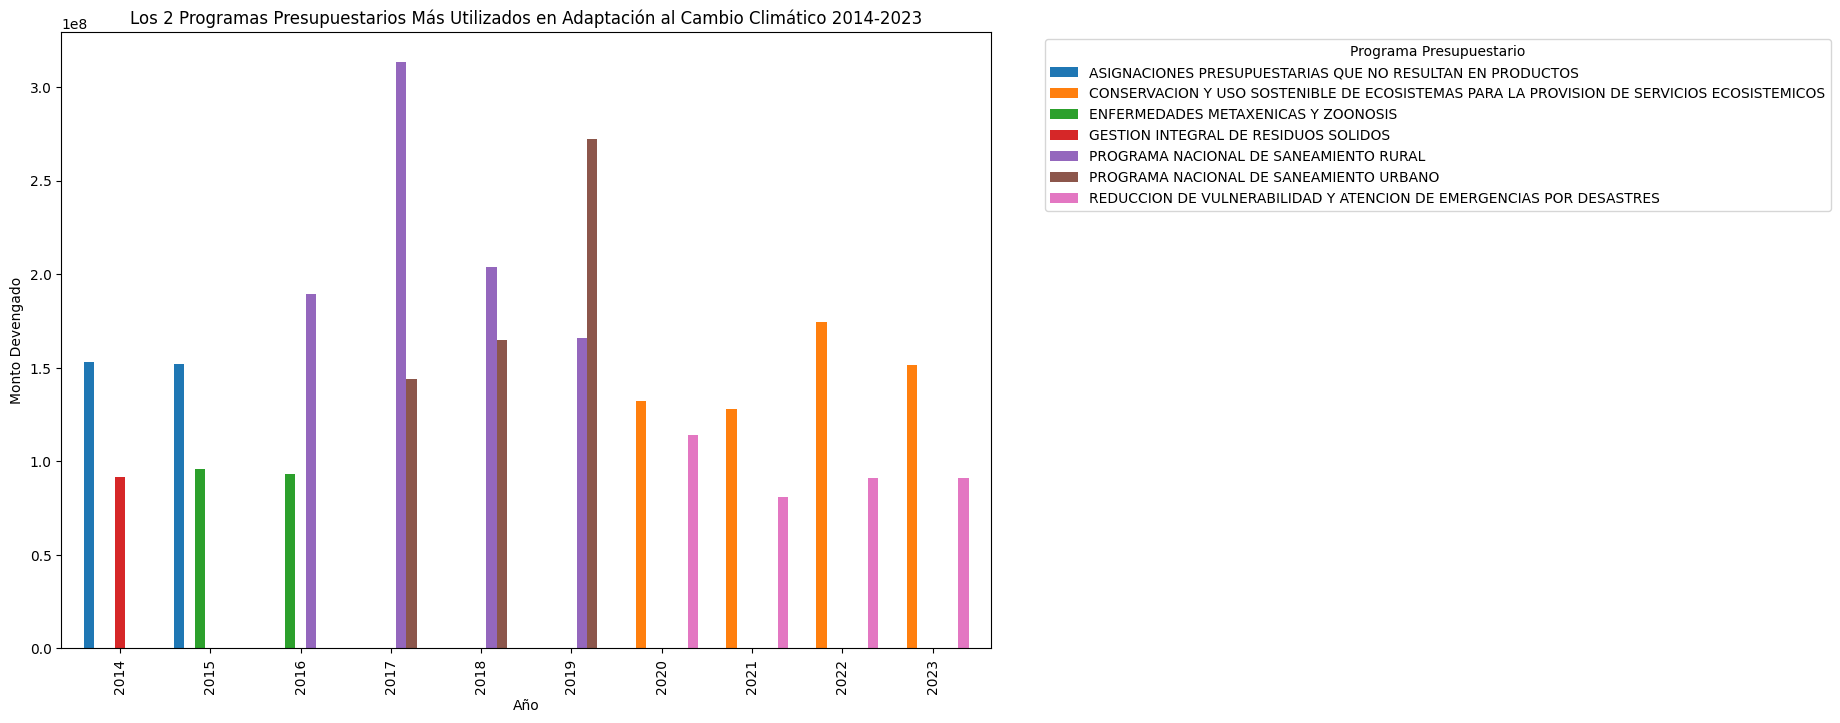

In [ ]:
# Filtrar el DataFrame para las columnas relevantes
gasto_programa = Gasto_Acum[['ANO_EJE', 'PROGRAMA_PPTO', 'PROGRAMA_PPTO_NOMBRE', 'MONTO_DEVENGADO']]

# Agrupar por año y programa presupuestario, sumando el gasto devengado
gasto_programa_anual = gasto_programa.groupby(['ANO_EJE', 'PROGRAMA_PPTO', 'PROGRAMA_PPTO_NOMBRE'])['MONTO_DEVENGADO'].sum().reset_index()

# Encontrar los dos programas presupuestarios más utilizados para cada año
top_programas_por_anio = gasto_programa_anual.groupby('ANO_EJE').apply(lambda x: x.nlargest(2, 'MONTO_DEVENGADO')).reset_index(drop=True)

# Pivote para tener los programas presupuestarios como columnas y los años como índice
top_programas_pivot = top_programas_por_anio.pivot(index='ANO_EJE', columns='PROGRAMA_PPTO_NOMBRE', values='MONTO_DEVENGADO')

# Graficar los dos programas presupuestarios más utilizados por año
top_programas_pivot.plot(kind='bar', figsize=(12, 8), width=0.8)

plt.title('Los 2 Programas Presupuestarios Más Utilizados en Adaptación al Cambio Climático 2014-2023')
plt.xlabel('Año')
plt.ylabel('Monto Devengado')
plt.legend(title='Programa Presupuestario', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# ***Tipo de Actividades que se han usado desde el 2014 hasta 2023***

In [ ]:
# Iterar por cada año
for year in range(2014, 2024):
    # Filtrar el DataFrame para el año específico
    gasto_por_tipo_anio = Gasto_Acum[Gasto_Acum['ANO_EJE'] == year]

    # Calcular el gasto total por tipo de actividad/proyecto
    gasto_por_tipo_anio = gasto_por_tipo_anio.groupby(['TIPO_ACT_PROY', 'TIPO_ACT_PROY_NOMBRE'])['MONTO_DEVENGADO'].sum().reset_index()

    # Obtener los cuatro tipos de actividad/proyecto más utilizados
    tipos_mas_utilizados = gasto_por_tipo_anio.nlargest(2, 'MONTO_DEVENGADO')

    # Mostrar la información
    print(f'\nAño: {year}')
    print(tipos_mas_utilizados[['TIPO_ACT_PROY_NOMBRE', 'MONTO_DEVENGADO']])




Año: 2014
  TIPO_ACT_PROY_NOMBRE  MONTO_DEVENGADO
1            ACTIVIDAD     3.980136e+08
0             PROYECTO     2.478974e+08

Año: 2015
  TIPO_ACT_PROY_NOMBRE  MONTO_DEVENGADO
1            ACTIVIDAD     4.285330e+08
0             PROYECTO     3.101969e+08

Año: 2016
  TIPO_ACT_PROY_NOMBRE  MONTO_DEVENGADO
0             PROYECTO     4.061565e+08
1            ACTIVIDAD     3.821886e+08

Año: 2017
  TIPO_ACT_PROY_NOMBRE  MONTO_DEVENGADO
0             PROYECTO     5.680296e+08
1            ACTIVIDAD     5.210770e+08

Año: 2018
  TIPO_ACT_PROY_NOMBRE  MONTO_DEVENGADO
1            ACTIVIDAD     5.489006e+08
0             PROYECTO     5.229341e+08

Año: 2019
  TIPO_ACT_PROY_NOMBRE  MONTO_DEVENGADO
0             PROYECTO     5.767347e+08
1            ACTIVIDAD     4.815110e+08

Año: 2020
  TIPO_ACT_PROY_NOMBRE  MONTO_DEVENGADO
1            ACTIVIDAD     2.389995e+08
0             PROYECTO     1.123216e+08

Año: 2021
  TIPO_ACT_PROY_NOMBRE  MONTO_DEVENGADO
1            ACTIVIDAD     2.152

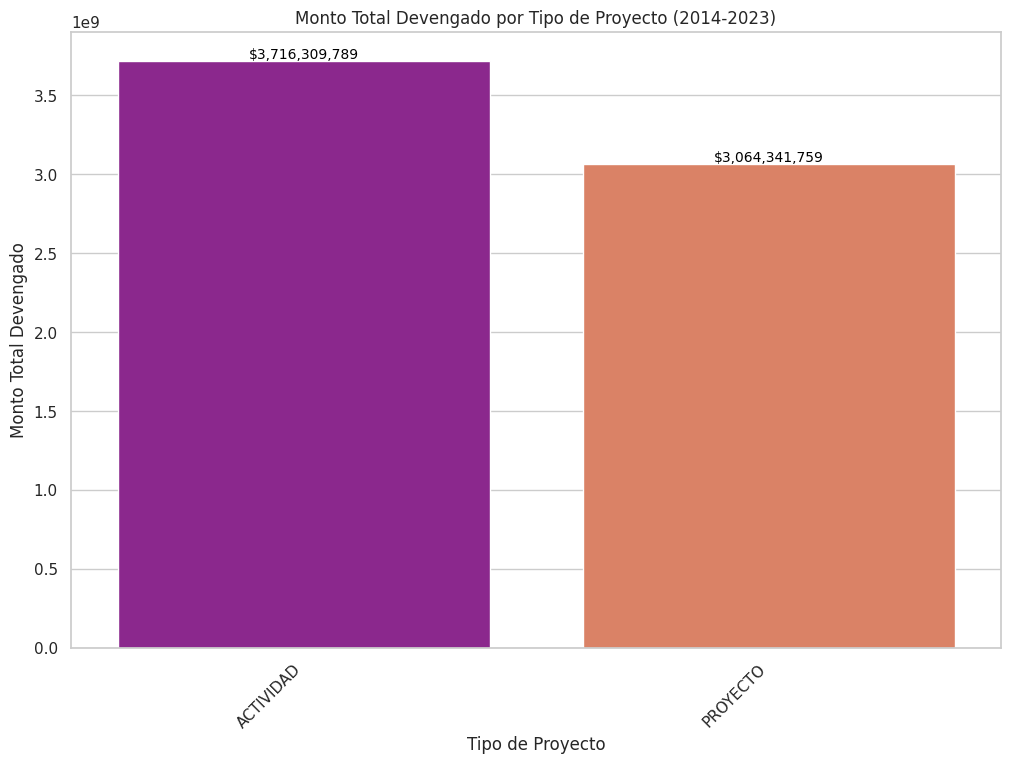

In [ ]:
# Configurar el estilo de los gráficos
sns.set(style="whitegrid")

# Filtrar el DataFrame para los años 2014 a 2023
gasto_sectores = Gasto_Acum[(Gasto_Acum['ANO_EJE'] >= 2014) & (Gasto_Acum['ANO_EJE'] <= 2023)]

# Calcular el monto total devengado por tipo de proyecto
monto_total_por_proyecto = gasto_sectores.groupby('TIPO_ACT_PROY_NOMBRE')['MONTO_DEVENGADO'].sum().reset_index()

# Graficar con una paleta de colores más intensa (plasma)
plt.figure(figsize=(12, 8))
ax = sns.barplot(x='TIPO_ACT_PROY_NOMBRE', y='MONTO_DEVENGADO', data=monto_total_por_proyecto, palette="plasma")

# Agregar etiquetas con los montos en cada barra
for p in ax.patches:
    ax.annotate(f"${p.get_height():,.0f}", (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.title('Monto Total Devengado por Tipo de Proyecto (2014-2023)')
plt.xlabel('Tipo de Proyecto')
plt.ylabel('Monto Total Devengado')
plt.xticks(rotation=45, ha='right')
plt.show()

# ***Datos de cada año que se uso:***

In [ ]:
# Lista de años
years = range(2014, 2024)

# Crear una lista para almacenar los DataFrames temporales
resultados_temporales = []

# Iterar por cada año
for year in years:
    # Filtrar el DataFrame para el año específico
    gasto_por_tipo_anio = Gasto_Acum[Gasto_Acum['ANO_EJE'] == year]

    # Obtener el tipo de actividad/proyecto con el monto devengado máximo
    max_tipo = gasto_por_tipo_anio.loc[gasto_por_tipo_anio['MONTO_DEVENGADO'].idxmax()]

    # Si el nombre es "SIN PRODUCTO" para los años 2015 y 2016, asignar un nombre diferente
    if year in [2015, 2016] and max_tipo['TIPO_ACT_PROY_NOMBRE'] == 'SIN PRODUCTO':
        max_tipo['TIPO_ACT_PROY_NOMBRE'] = f'SIN PRODUCTO {year}'

    # Crear un DataFrame temporal
    df_temporal = pd.DataFrame({'Año': [year],
                                'Tipo': [max_tipo['TIPO_ACT_PROY_NOMBRE']],
                                'Nombre': [max_tipo['PRODUCTO_PROYECTO_NOMBRE'] if max_tipo['PRODUCTO_PROYECTO_NOMBRE'] != 'SIN PRODUCTO' else max_tipo['ACTIVIDAD_ACCION_OBRA_NOMBRE']],
                                'Monto Devengado': [max_tipo['MONTO_DEVENGADO']]})

    # Agregar el DataFrame temporal a la lista
    resultados_temporales.append(df_temporal)

# Concatenar los DataFrames temporales en uno solo
resultados = pd.concat(resultados_temporales, ignore_index=True)

# Ordenar los resultados por año
resultados = resultados.sort_values(by='Año')

# Mostrar los resultados
print(resultados)


    Año       Tipo                                             Nombre  \
0  2014  ACTIVIDAD  PRODUCTORES AGRICOLAS CON MENOR PRESENCIA DE P...   
1  2015  ACTIVIDAD                IMPLEMENTACION DE COCINAS MEJORADAS   
2  2016  ACTIVIDAD  IMPLEMENTACION DE ACCIONES DE POLITICA DE EFIC...   
3  2017   PROYECTO  AMPLIACION Y MEJORAMIENTO DE LOS SISTEMAS DE A...   
4  2018   PROYECTO  AMPLIACION Y MEJORAMIENTO DEL SISTEMA DE AGUA ...   
5  2019   PROYECTO  MEJORAMIENTO DEL SISTEMA DE EVACUACION, TRATAM...   
6  2020   PROYECTO  RECUPERACION DE ECOSISTEMAS DEGRADADOS EN EL A...   
7  2021  ACTIVIDAD  HECTAREAS DE ECOSISTEMAS CONSERVADOS PARA ASEG...   
8  2022  ACTIVIDAD  HECTAREAS DE ECOSISTEMAS CONSERVADOS PARA ASEG...   
9  2023  ACTIVIDAD  HECTAREAS DE ECOSISTEMAS CONSERVADOS PARA ASEG...   

   Monto Devengado  
0      22966741.21  
1      33287082.20  
2       7328851.48  
3      11358357.85  
4       9776000.00  
5      24782427.77  
6       2509746.56  
7       1897483.69  
8      

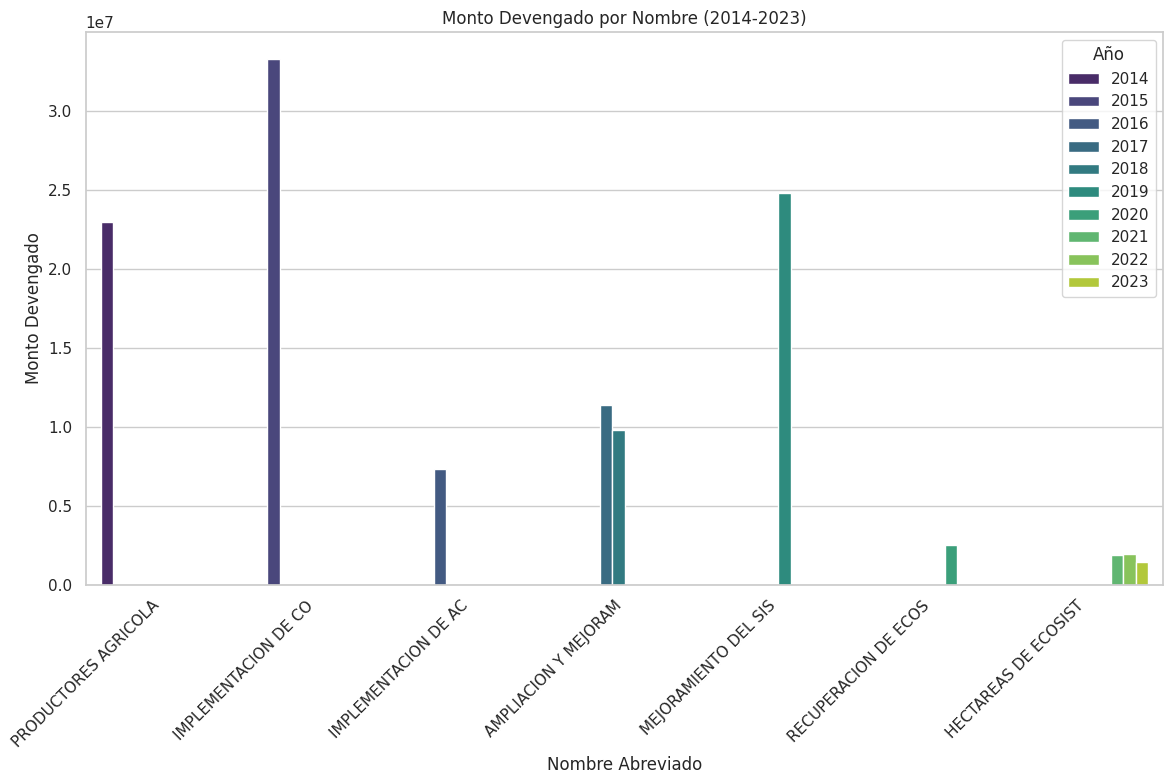

In [ ]:
# Reducir la longitud de las etiquetas
resultados['Nombre Abreviado'] = resultados['Nombre'].apply(lambda x: x[:20])

# Crear un gráfico de barras de lado
plt.figure(figsize=(12, 8))
sns.barplot(x='Nombre Abreviado', y='Monto Devengado', hue='Año', data=resultados, palette='viridis')

# Configurar etiquetas y título
plt.xlabel('Nombre Abreviado')
plt.ylabel('Monto Devengado')
plt.title('Monto Devengado por Nombre (2014-2023)')

# Rotar las etiquetas del eje x para mejor legibilidad
plt.xticks(rotation=45, ha='right')

# Ajustar el diseño para evitar solapamientos
plt.tight_layout()

# Mostrar el gráfico
plt.show()


# ***Objetivo 2: Identificar las fuentes de financiación ante el cambio climático de 2014 a 2023***

# ***Fuente de financiamiento ante el cambio climatico***

# 2014

In [ ]:
# Filtrar el DataFrame para el año 2014
gasto_2014 = Gasto_Acum[Gasto_Acum['ANO_EJE'] == 2014]

# Agrupar por fuente de financiamiento y calcular la suma del monto devengado para el año 2014
resumen_2014 = gasto_2014.groupby('FUENTE_FINANCIAMIENTO_NOMBRE')['MONTO_DEVENGADO'].sum().reset_index()

# Mostrar el resumen
print(resumen_2014)

                    FUENTE_FINANCIAMIENTO_NOMBRE  MONTO_DEVENGADO
0                    DONACIONES Y TRANSFERENCIAS     2.437117e+07
1                          RECURSOS DETERMINADOS     2.044297e+08
2               RECURSOS DIRECTAMENTE RECAUDADOS     1.279282e+08
3                            RECURSOS ORDINARIOS     2.871726e+08
4  RECURSOS POR OPERACIONES OFICIALES DE CREDITO     2.009316e+06


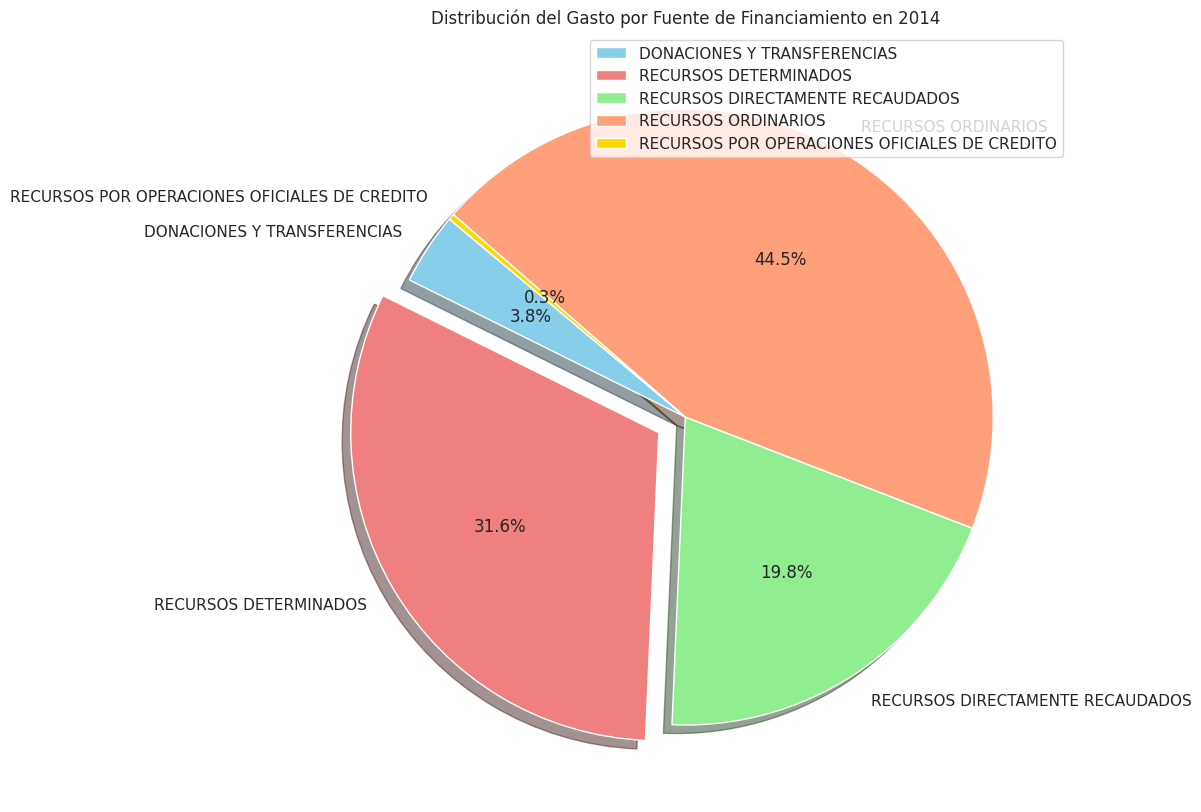

In [ ]:
# Configurar el tamaño del gráfico
plt.figure(figsize=(10, 10))

# Colores personalizados
colores = ['skyblue', 'lightcoral', 'lightgreen', 'lightsalmon', 'gold']

# Explotar el sector 'RECURSOS DETERMINADOS'
explode = (0, 0.1, 0, 0, 0)

# Crear un gráfico de pastel
plt.pie(resumen_2014['MONTO_DEVENGADO'], labels=resumen_2014['FUENTE_FINANCIAMIENTO_NOMBRE'], autopct='%1.1f%%',
        startangle=140, colors=colores, explode=explode, shadow=True)

# Añadir un título
plt.title('Distribución del Gasto por Fuente de Financiamiento en 2014')

# Añadir leyenda
plt.legend(loc='best')

# Mostrar el gráfico
plt.show()


# 2015

In [ ]:
# Filtrar el DataFrame para el año 2015
gasto_2015 = Gasto_Acum[Gasto_Acum['ANO_EJE'] == 2015]

# Agrupar por fuente de financiamiento y calcular la suma del monto devengado para el año 2015
resumen_2015 = gasto_2014.groupby('FUENTE_FINANCIAMIENTO_NOMBRE')['MONTO_DEVENGADO'].sum().reset_index()

# Mostrar el resumen
print(resumen_2015)

                    FUENTE_FINANCIAMIENTO_NOMBRE  MONTO_DEVENGADO
0                    DONACIONES Y TRANSFERENCIAS     2.437117e+07
1                          RECURSOS DETERMINADOS     2.044297e+08
2               RECURSOS DIRECTAMENTE RECAUDADOS     1.279282e+08
3                            RECURSOS ORDINARIOS     2.871726e+08
4  RECURSOS POR OPERACIONES OFICIALES DE CREDITO     2.009316e+06


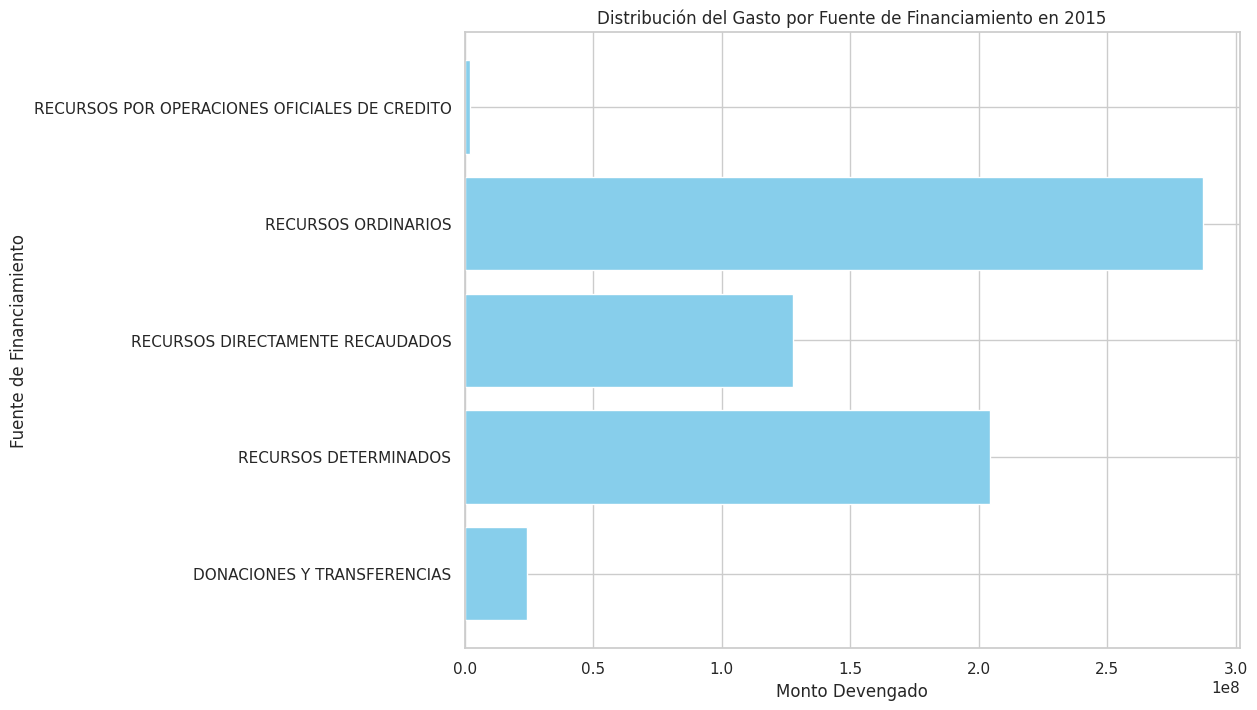

In [ ]:

# Configurar el tamaño del gráfico
plt.figure(figsize=(10, 8))

# Crear un gráfico de barras horizontales
plt.barh(resumen_2015['FUENTE_FINANCIAMIENTO_NOMBRE'], resumen_2015['MONTO_DEVENGADO'], color='skyblue')

# Añadir etiquetas y título
plt.xlabel('Monto Devengado')
plt.ylabel('Fuente de Financiamiento')
plt.title('Distribución del Gasto por Fuente de Financiamiento en 2015')

# Mostrar el gráfico
plt.show()


# 2016

In [ ]:
# Filtrar el DataFrame para el año 2016
gasto_2016 = Gasto_Acum[Gasto_Acum['ANO_EJE'] == 2016]

# Agrupar por fuente de financiamiento y calcular la suma del monto devengado para el año 2016
resumen_2016 = gasto_2016.groupby('FUENTE_FINANCIAMIENTO_NOMBRE')['MONTO_DEVENGADO'].sum().reset_index()

# Mostrar el resumen
print(resumen_2016)


                    FUENTE_FINANCIAMIENTO_NOMBRE  MONTO_DEVENGADO
0                    DONACIONES Y TRANSFERENCIAS     4.074709e+07
1                          RECURSOS DETERMINADOS     1.851369e+08
2               RECURSOS DIRECTAMENTE RECAUDADOS     6.070705e+07
3                            RECURSOS ORDINARIOS     4.337789e+08
4  RECURSOS POR OPERACIONES OFICIALES DE CREDITO     6.797518e+07


In [ ]:
# Configurar el tamaño del gráfico
fig = px.area(resumen_2016, x='FUENTE_FINANCIAMIENTO_NOMBRE', y='MONTO_DEVENGADO', title='Distribución del Gasto por Fuente de Financiamiento en 2016',
              labels={'MONTO_DEVENGADO': 'Monto Devengado', 'FUENTE_FINANCIAMIENTO_NOMBRE': 'Fuente de Financiamiento'})

# Configurar diseño y mostrar el gráfico interactivo
fig.update_layout(barmode='stack', xaxis_title='Fuente de Financiamiento', yaxis_title='Monto Devengado ($)', template='plotly', paper_bgcolor='lightgray')
fig.show()

# **2017**

In [ ]:
# Filtrar el DataFrame para el año 2017
gasto_2017 = Gasto_Acum[Gasto_Acum['ANO_EJE'] == 2017]

# Agrupar por fuente de financiamiento y calcular la suma del monto devengado para el año 2017
resumen_2017 = gasto_2017.groupby('FUENTE_FINANCIAMIENTO_NOMBRE')['MONTO_DEVENGADO'].sum().reset_index()

# Mostrar el resumen
print(resumen_2017)


                    FUENTE_FINANCIAMIENTO_NOMBRE  MONTO_DEVENGADO
0                    DONACIONES Y TRANSFERENCIAS     4.483284e+07
1                          RECURSOS DETERMINADOS     1.610729e+08
2               RECURSOS DIRECTAMENTE RECAUDADOS     1.446453e+08
3                            RECURSOS ORDINARIOS     4.325928e+08
4  RECURSOS POR OPERACIONES OFICIALES DE CREDITO     3.059628e+08


In [ ]:
# Configurar el tamaño del gráfico
fig = px.pie(resumen_2017, values='MONTO_DEVENGADO', names='FUENTE_FINANCIAMIENTO_NOMBRE',
             title='Distribución del Gasto por Fuente de Financiamiento en 2017')

# Configurar diseño y mostrar el gráfico interactivo
fig.update_layout(template='plotly', paper_bgcolor='lightgray')
fig.show()

# **2018**

In [ ]:
# Filtrar el DataFrame para el año 2018
gasto_2018 = Gasto_Acum[Gasto_Acum['ANO_EJE'] == 2018]

# Agrupar por fuente de financiamiento y calcular la suma del monto devengado para el año 2018
resumen_2018 = gasto_2018.groupby('FUENTE_FINANCIAMIENTO_NOMBRE')['MONTO_DEVENGADO'].sum().reset_index()

# Mostrar el resumen
print(resumen_2018)


                    FUENTE_FINANCIAMIENTO_NOMBRE  MONTO_DEVENGADO
0                    DONACIONES Y TRANSFERENCIAS     2.894668e+07
1                          RECURSOS DETERMINADOS     2.449872e+08
2               RECURSOS DIRECTAMENTE RECAUDADOS     1.879195e+08
3                            RECURSOS ORDINARIOS     3.458973e+08
4  RECURSOS POR OPERACIONES OFICIALES DE CREDITO     2.640839e+08


In [ ]:
# Configurar el tamaño del gráfico
fig = px.scatter(resumen_2018, x='FUENTE_FINANCIAMIENTO_NOMBRE', y='MONTO_DEVENGADO',
                 size='MONTO_DEVENGADO', title='Gasto por Fuente de Financiamiento en 2018',
                 labels={'FUENTE_FINANCIAMIENTO_NOMBRE': 'Fuente de Financiamiento', 'MONTO_DEVENGADO': 'Monto Devengado'},
                 size_max=50, color='MONTO_DEVENGADO', color_continuous_scale='viridis')

# Configurar diseño y mostrar el gráfico interactivo
fig.update_layout(template='plotly', paper_bgcolor='lightgray')
fig.show()

# **2019**

In [ ]:
# Filtrar el DataFrame para el año 2019
gasto_2019 = Gasto_Acum[Gasto_Acum['ANO_EJE'] == 2019]

# Agrupar por fuente de financiamiento y calcular la suma del monto devengado para el año 2019
resumen_2019 = gasto_2019.groupby('FUENTE_FINANCIAMIENTO_NOMBRE')['MONTO_DEVENGADO'].sum().reset_index()

# Mostrar el resumen
print(resumen_2019)


                    FUENTE_FINANCIAMIENTO_NOMBRE  MONTO_DEVENGADO
0                    DONACIONES Y TRANSFERENCIAS     2.479105e+07
1                          RECURSOS DETERMINADOS     1.130930e+08
2               RECURSOS DIRECTAMENTE RECAUDADOS     1.602549e+08
3                            RECURSOS ORDINARIOS     5.261150e+08
4  RECURSOS POR OPERACIONES OFICIALES DE CREDITO     2.339917e+08


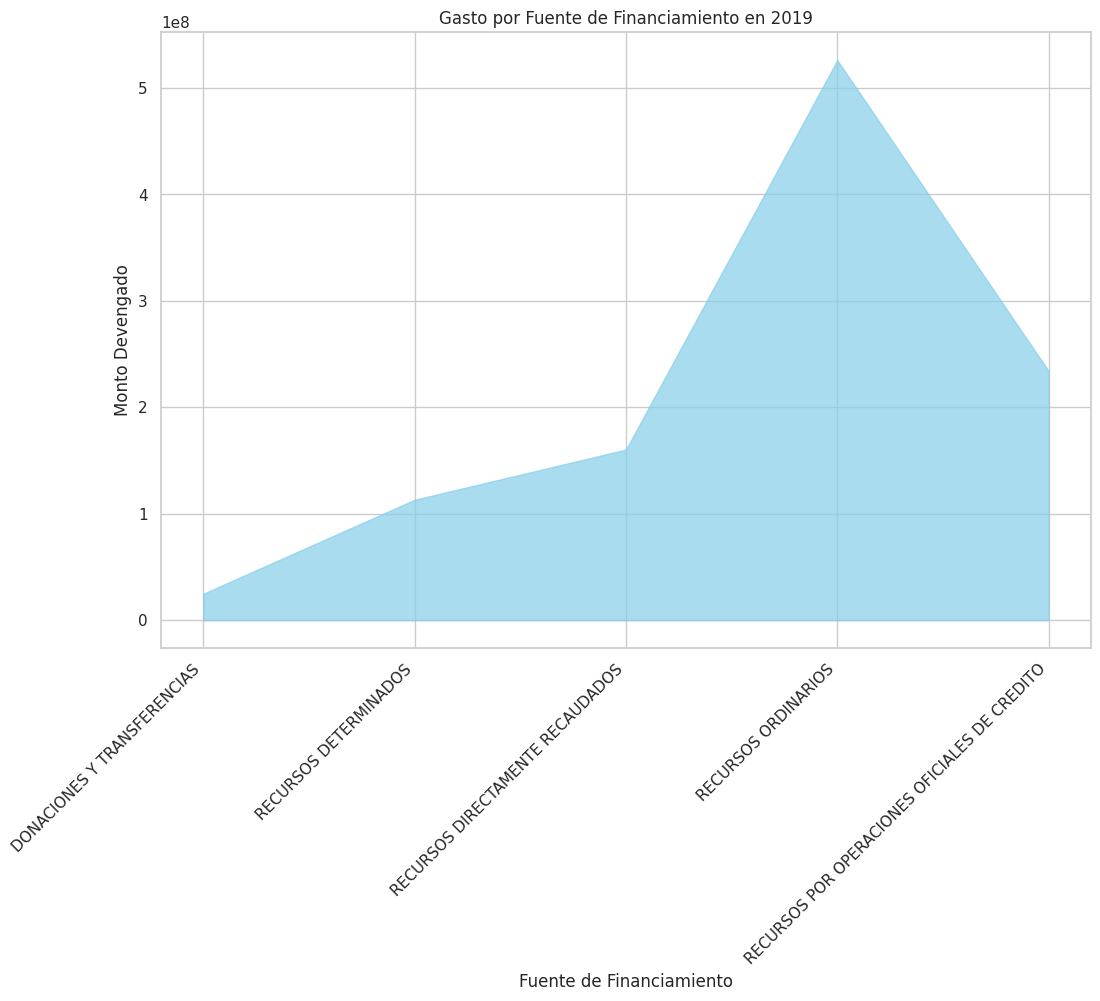

In [ ]:
# Configurar el tamaño del gráfico
plt.figure(figsize=(12, 8))

# Crear un gráfico de área
plt.fill_between(resumen_2019['FUENTE_FINANCIAMIENTO_NOMBRE'], resumen_2019['MONTO_DEVENGADO'], color='skyblue', alpha=0.7)

# Configurar etiquetas y título
plt.title('Gasto por Fuente de Financiamiento en 2019')
plt.xlabel('Fuente de Financiamiento')
plt.ylabel('Monto Devengado')
plt.xticks(rotation=45, ha='right')  # Rotar las etiquetas del eje x para mayor legibilidad

# Mostrar el gráfico
plt.show()

# **2020**

In [ ]:
# Filtrar el DataFrame para el año 2020
gasto_2020 = Gasto_Acum[Gasto_Acum['ANO_EJE'] == 2020]

# Agrupar por fuente de financiamiento y calcular la suma del monto devengado para el año 2020
resumen_2020 = gasto_2020.groupby('FUENTE_FINANCIAMIENTO_NOMBRE')['MONTO_DEVENGADO'].sum().reset_index()

# Mostrar el resumen
print(resumen_2020)


                    FUENTE_FINANCIAMIENTO_NOMBRE  MONTO_DEVENGADO
0                    DONACIONES Y TRANSFERENCIAS     8.299833e+06
1                          RECURSOS DETERMINADOS     6.044969e+07
2               RECURSOS DIRECTAMENTE RECAUDADOS     8.036437e+07
3                            RECURSOS ORDINARIOS     1.986690e+08
4  RECURSOS POR OPERACIONES OFICIALES DE CREDITO     3.538145e+06


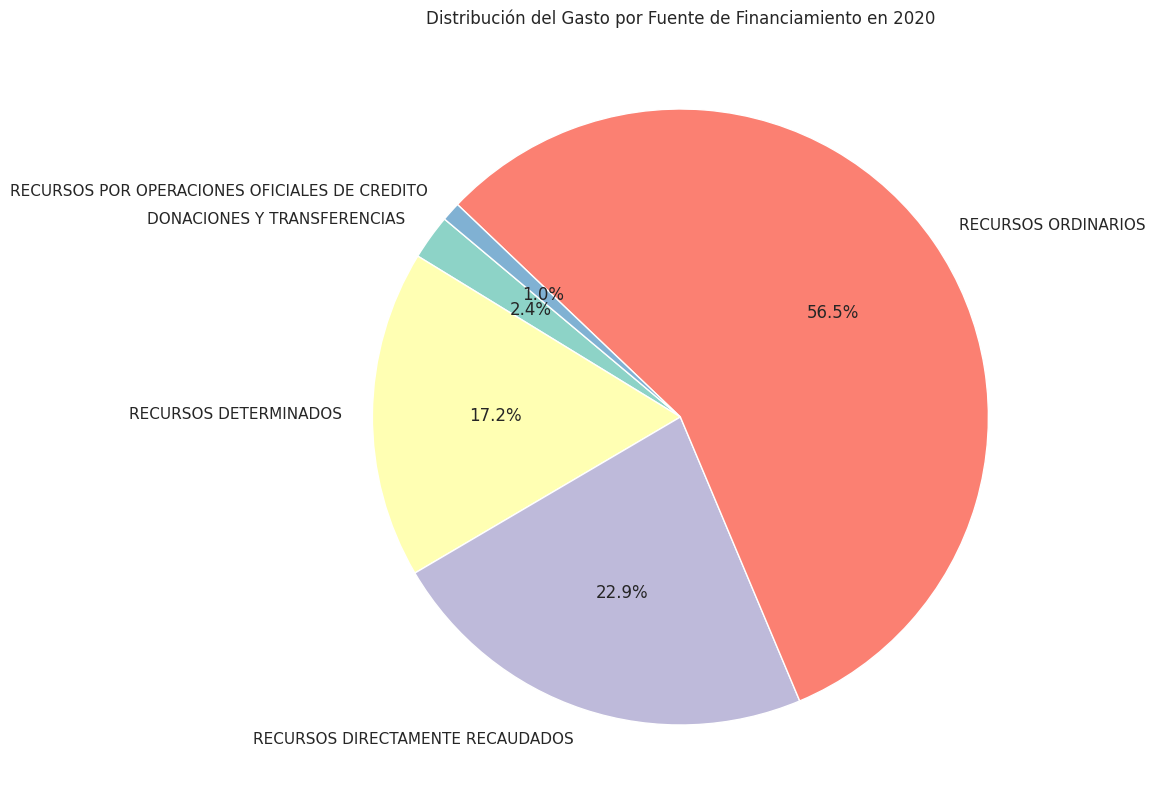

In [ ]:
# Configurar el tamaño del gráfico
plt.figure(figsize=(10, 10))

# Crear un gráfico de pastel con colores más vibrantes
colors = sns.color_palette('Set3', len(resumen_2020))
plt.pie(resumen_2020['MONTO_DEVENGADO'], labels=resumen_2020['FUENTE_FINANCIAMIENTO_NOMBRE'],
        autopct='%1.1f%%', startangle=140, colors=colors)

# Configurar título
plt.title('Distribución del Gasto por Fuente de Financiamiento en 2020')

# Mostrar el gráfico
plt.show()

# **2021**

In [ ]:
# Filtrar el DataFrame para el año 2021
gasto_2021 = Gasto_Acum[Gasto_Acum['ANO_EJE'] == 2021]

# Agrupar por fuente de financiamiento y calcular la suma del monto devengado para el año 2021
resumen_2021 = gasto_2021.groupby('FUENTE_FINANCIAMIENTO_NOMBRE')['MONTO_DEVENGADO'].sum().reset_index()

# Mostrar el resumen
print(resumen_2021)


                    FUENTE_FINANCIAMIENTO_NOMBRE  MONTO_DEVENGADO
0                    DONACIONES Y TRANSFERENCIAS     8.124475e+06
1                          RECURSOS DETERMINADOS     5.518458e+07
2               RECURSOS DIRECTAMENTE RECAUDADOS     7.667973e+07
3                            RECURSOS ORDINARIOS     1.374881e+08
4  RECURSOS POR OPERACIONES OFICIALES DE CREDITO     3.608180e+07


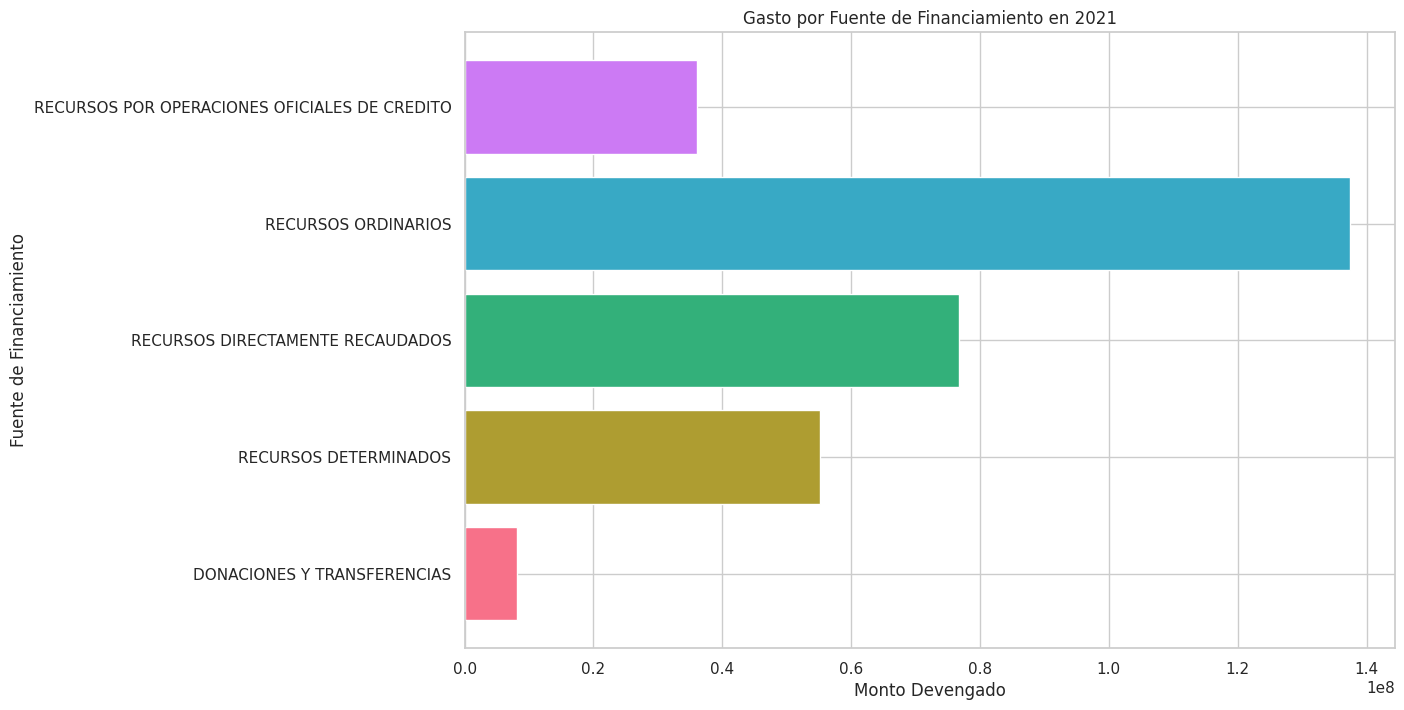

In [ ]:
# Configurar el tamaño del gráfico
plt.figure(figsize=(12, 8))

# Utilizar la paleta de colores de seaborn
colors = sns.color_palette('husl', len(resumen_2021))

# Crear un gráfico de barras horizontales con diferentes colores
plt.barh(resumen_2021['FUENTE_FINANCIAMIENTO_NOMBRE'], resumen_2021['MONTO_DEVENGADO'], color=colors)

# Configurar etiquetas y título
plt.title('Gasto por Fuente de Financiamiento en 2021')
plt.xlabel('Monto Devengado')
plt.ylabel('Fuente de Financiamiento')

# Mostrar el gráfico
plt.show()

# **2022**

In [ ]:
# Filtrar el DataFrame para el año 2022
gasto_2022 = Gasto_Acum[Gasto_Acum['ANO_EJE'] == 2022]

# Agrupar por fuente de financiamiento y calcular la suma del monto devengado para el año 2022
resumen_2022 = gasto_2022.groupby('FUENTE_FINANCIAMIENTO_NOMBRE')['MONTO_DEVENGADO'].sum().reset_index()

# Mostrar el resumen
print(resumen_2022)


                    FUENTE_FINANCIAMIENTO_NOMBRE  MONTO_DEVENGADO
0                    DONACIONES Y TRANSFERENCIAS     8.934022e+06
1                          RECURSOS DETERMINADOS     9.199090e+07
2               RECURSOS DIRECTAMENTE RECAUDADOS     1.071273e+08
3                            RECURSOS ORDINARIOS     1.706598e+08
4  RECURSOS POR OPERACIONES OFICIALES DE CREDITO     7.687837e+06


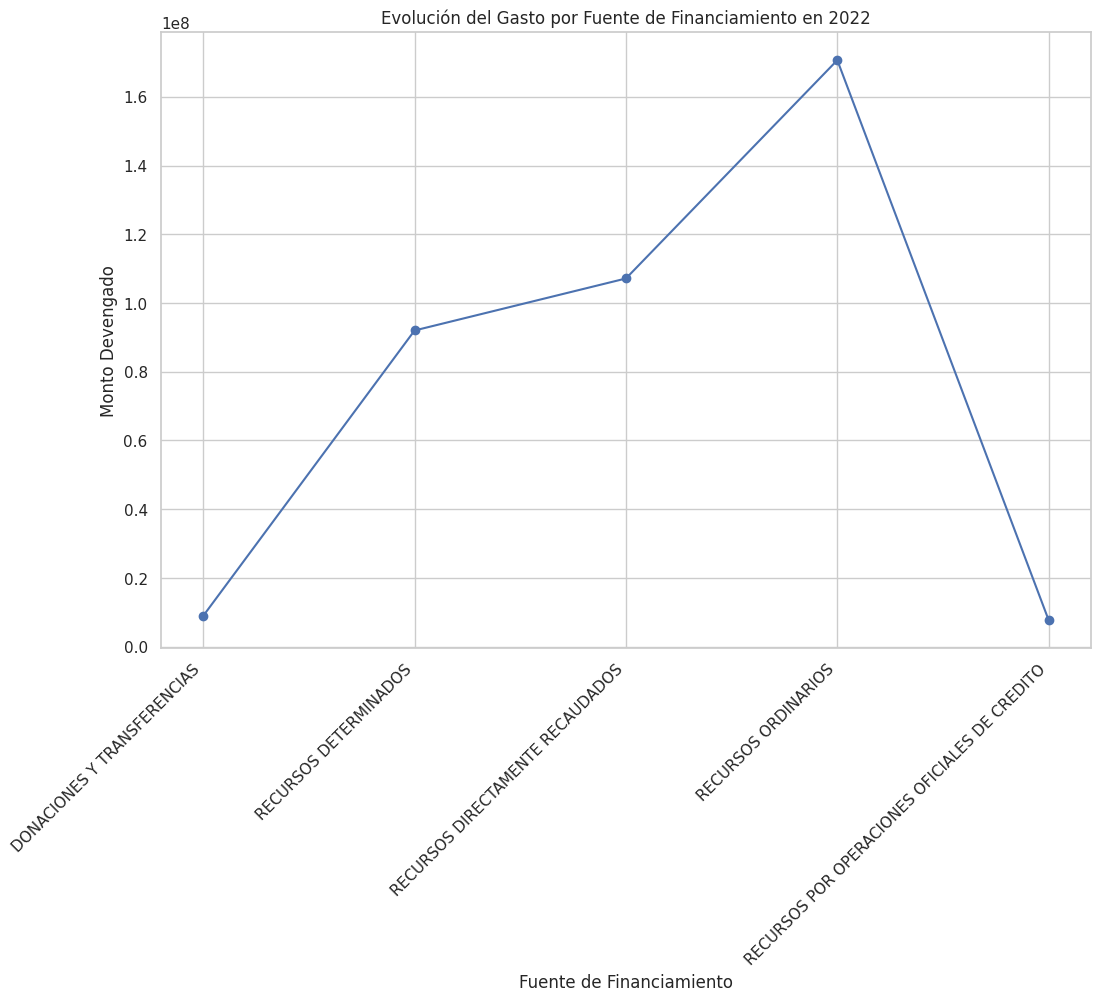

In [ ]:
# Configurar el tamaño del gráfico
plt.figure(figsize=(12, 8))

# Crear un gráfico de líneas con puntos
plt.plot(resumen_2022['FUENTE_FINANCIAMIENTO_NOMBRE'], resumen_2022['MONTO_DEVENGADO'], marker='o', linestyle='-')

# Configurar etiquetas y título
plt.title('Evolución del Gasto por Fuente de Financiamiento en 2022')
plt.xlabel('Fuente de Financiamiento')
plt.ylabel('Monto Devengado')
plt.xticks(rotation=45, ha='right')  # Rotar las etiquetas del eje x para mayor legibilidad

# Mostrar el gráfico
plt.show()

# **2023**

In [ ]:
# Filtrar el DataFrame para el año 2023
gasto_2023 = Gasto_Acum[Gasto_Acum['ANO_EJE'] == 2023]

# Agrupar por fuente de financiamiento y calcular la suma del monto devengado para el año 2023
resumen_2023 = gasto_2023.groupby('FUENTE_FINANCIAMIENTO_NOMBRE')['MONTO_DEVENGADO'].sum().reset_index()

# Mostrar el resumen
print(resumen_2023)


                    FUENTE_FINANCIAMIENTO_NOMBRE  MONTO_DEVENGADO
0                    DONACIONES Y TRANSFERENCIAS     9.891588e+05
1                          RECURSOS DETERMINADOS     6.858593e+07
2               RECURSOS DIRECTAMENTE RECAUDADOS     6.989306e+07
3                            RECURSOS ORDINARIOS     1.957772e+08
4  RECURSOS POR OPERACIONES OFICIALES DE CREDITO     1.953675e+06


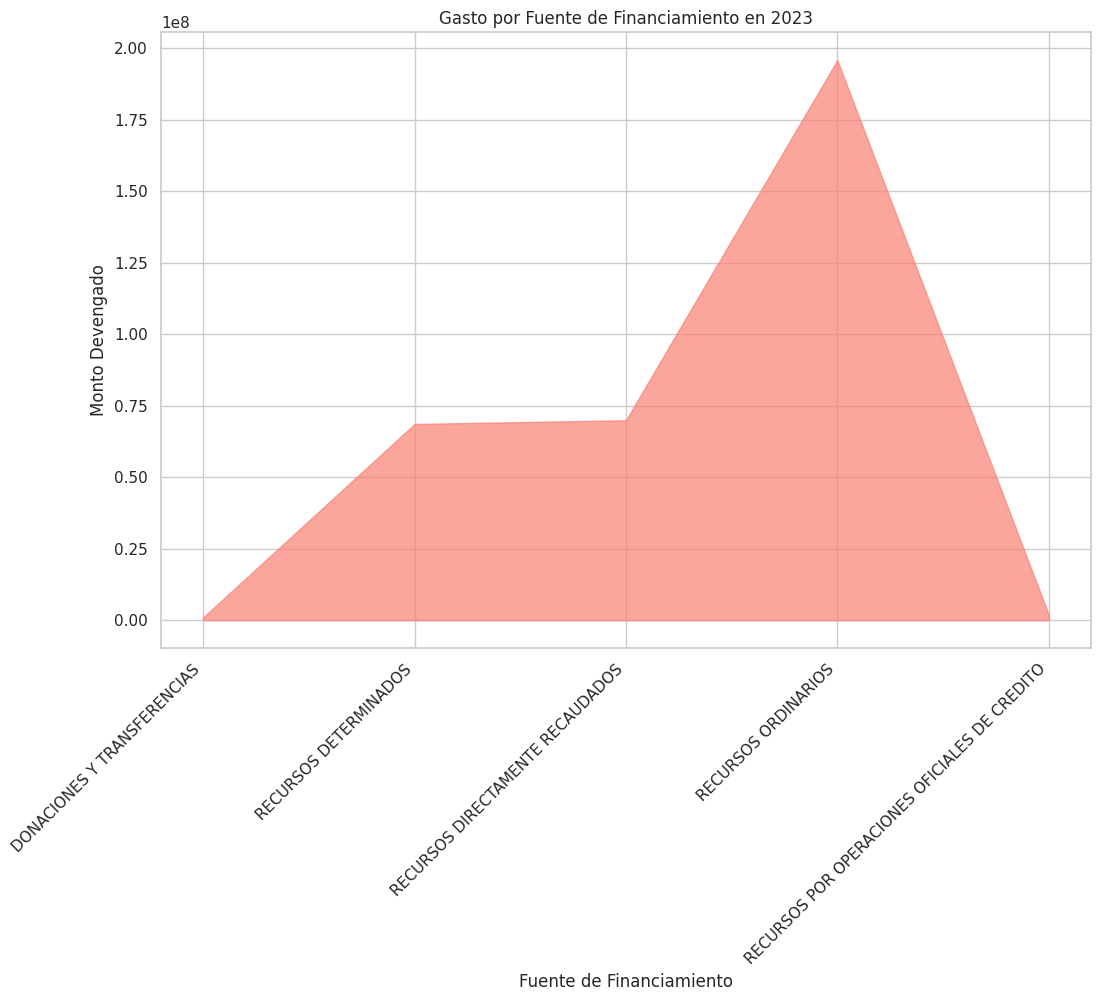

In [ ]:
# Configurar el tamaño del gráfico
plt.figure(figsize=(12, 8))

# Crear un gráfico de área
plt.fill_between(resumen_2023['FUENTE_FINANCIAMIENTO_NOMBRE'], resumen_2023['MONTO_DEVENGADO'], color='salmon', alpha=0.7)

# Configurar etiquetas y título
plt.title('Gasto por Fuente de Financiamiento en 2023')
plt.xlabel('Fuente de Financiamiento')
plt.ylabel('Monto Devengado')
plt.xticks(rotation=45, ha='right')  # Rotar las etiquetas del eje x para mayor legibilidad

# Mostrar el gráfico
plt.show()

esto es aparte

In [ ]:
# Imprimir la lista de columnas en el DataFrame
print(Gasto_Acum.columns)

Index(['ANO_EJE', 'MES_EJE', 'NIVEL_GOBIERNO', 'NIVEL_GOBIERNO_NOMBRE',
       'SECTOR', 'SECTOR_NOMBRE', 'PLIEGO', 'PLIEGO_NOMBRE', 'SEC_EJEC',
       'EJECUTORA', 'EJECUTORA_NOMBRE', 'DEPARTAMENTO_EJECUTORA',
       'DEPARTAMENTO_EJECUTORA_NOMBRE', 'PROVINCIA_EJECUTORA',
       'PROVINCIA_EJECUTORA_NOMBRE', 'DISTRITO_EJECUTORA',
       'DISTRITO_EJECUTORA_NOMBRE', 'SEC_FUNC', 'PROGRAMA_PPTO',
       'PROGRAMA_PPTO_NOMBRE', 'TIPO_ACT_PROY', 'TIPO_ACT_PROY_NOMBRE',
       'PRODUCTO_PROYECTO', 'PRODUCTO_PROYECTO_NOMBRE',
       'ACTIVIDAD_ACCION_OBRA', 'ACTIVIDAD_ACCION_OBRA_NOMBRE', 'FUNCION',
       'FUNCION_NOMBRE', 'DIVISION_FUNCIONAL', 'DIVISION_FUNCIONAL_NOMBRE',
       'GRUPO_FUNCIONAL', 'GRUPO_FUNCIONAL_NOMBRE', 'META', 'FINALIDAD',
       'META_NOMBRE', 'DEPARTAMENTO_META', 'DEPARTAMENTO_META_NOMBRE',
       'FUENTE_FINANCIAMIENTO', 'FUENTE_FINANCIAMIENTO_NOMBRE', 'RUBRO',
       'RUBRO_NOMBRE', 'TIPO_RECURSO', 'TIPO_RECURSO_NOMBRE',
       'CATEGORIA_GASTO', 'CATEGORIA_GASTO_N